## 觀察與探索資料集

In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt
from PIL import ImageColor
from sklearn.cluster import KMeans

In [2]:
# 有多少 sample data
folder = './data/'
files = [f for f in listdir(folder) if isfile(join(folder, f))]
print('Amount of the files:', len(files))

Amount of the files: 1290


In [77]:
# 看每個 sample 出現過的 syscall 類別
all_syscall = []
for idx, file in enumerate(files):
    sample = pd.read_csv(folder + file)
    all_syscall.extend(set(list(sample['SYSCALL'])))

counter = Counter(all_syscall)
print(len(counter))
counter.most_common(20)

C:\Users\cherry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,6,8,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\cherry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\cherry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\cherry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body,

241


[('execve', 1285),
 ('EXIT', 887),
 ('close', 886),
 ('getpid', 871),
 ('open', 851),
 ('rt_sigaction', 819),
 ('socket', 793),
 ('connect', 776),
 ('time', 744),
 ('brk', 698),
 ('fcntl', 697),
 ('fork', 688),
 ('read', 685),
 ('exit', 684),
 ('_newselect', 683),
 ('getsockname', 682),
 ('rt_sigprocmask', 664),
 ('setsid', 634),
 ('write', 600),
 ('prctl', 559)]

In [78]:
# 看所有 sample 出現過的所有 syscall 與數量總和
all_syscall_count = []
for idx, file in enumerate(files):
    sample = pd.read_csv(folder + file)
    all_syscall_count.extend(list(sample['SYSCALL']))

counter = Counter(all_syscall_count)
print(len(counter))
counter.most_common(20)

241


[('open', 9169934),
 ('sendto', 8326093),
 ('read', 6875117),
 ('syscall_0x8094', 3031206),
 ('recvfrom', 1442064),
 ('time', 1259743),
 ('fcntl', 1089043),
 ('close', 686918),
 ('socket', 679927),
 ('recv', 618663),
 ('getsockopt', 606009),
 ('connect', 598978),
 ('brk', 244031),
 ('fcntl64', 147359),
 ('_newselect', 120841),
 ('getpid', 108066),
 ('send', 90854),
 ('gettimeofday', 90082),
 ('getdents64', 86863),
 ('access', 79687)]

In [3]:
# sample屬於哪種 malware family
malware_family = pd.read_csv("./dataset.csv")

C:\Users\cherry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# 查該檔案屬於哪種 family
def query_family(filename):
    for idx, fname in enumerate(malware_family['filename']):
        if fname == filename:
            return malware_family['label'][idx]
    return 'file not found!'

family_list = []
family_dict = {'Android': [], 'Bashlite': [], 'Mirai': [], 'Tsunami': [], 'Dofloo': [], 'Xorddos': [], 'Hajime': [], 
               'Unknown': []}

for file in files:
    filename = file[0:-4]
    qf = query_family(filename)
    family_list.append(qf)
    family_dict[qf].append(file)

counter = Counter(family_list)
counter

Counter({'Android': 48,
         'Bashlite': 377,
         'Mirai': 653,
         'Unknown': 148,
         'Tsunami': 27,
         'Dofloo': 14,
         'Xorddos': 13,
         'Hajime': 10})

## 統計所有出現過的 syscall，並且依據 https://man7.org/linux/man-pages/index.html 提到該syscall 需引入哪種 header 作為分類依據

### 共以下 16 種類別

unistd.h 40
sys/uio.h 2
stdlib.h 2
signal.h 4
socket.h 11
time.h 5
fcntl.h 11
prctl.h 2
sys/wait.h 2
sys/stat.h 11
mman.h 4
resource.h 3
SIG 8
syscall.h
futex.h
other

### 紀錄每種 syscall 需要引入哪些 header

execve: unistd.h
writev: sys/uio.h
getpid: unistd.h
exit_group: sys/syscall.h, unistd.h
EXIT: stdlib.h
rt_sigprocmask: signal.h, sys/syscall.h, unistd.h
rt_sigaction: signal.h
socket: sys/socket.h
connect: sys/socket.h
getsockname: sys/socket.h
close: unistd.h
brk: unistd.h
time: time.h
getppid: unistd.h
times: sys/times.h
write: unistd.h
fork: unistd.h
exit: stdlib.h
setsid: unistd.h
fcntl: fcntl.h
open: fcntl.h
setsockopt: sys/socket.h
sendto: sys/socket.h
recvfrom: sys/socket.h
read: unistd.h
newselect: sys/select.h
getsockopt: sys/socket.h
recv: sys/socket.h
bind: sys/socket.h
listen: sys/socket.h
fstat: sys/stat.h
getdents64: sys/syscall.h, unistd.h
readlink: unistd.h
kill: signal.h
send: sys/socket.h
nanosleep: time.h
prctl: sys/prctl.h
SIGCHLD: ?????
socketcall: linux/net.h, sys/syscall.h, unistd.h
SIGBUS: ???
KILL: signal.h
restart_syscall: ???
ioctl: sys/ioctl.h
wait4: sys/wait.h
chdir: unistd.h
setuid32: unistd.h
setresuid32: unistd.h
access: unistd.h, fcntl.h, sys/syscall.h
vfork: unistd.h
set_thread_area: sys/syscall.h, unistd.h, asm/ldt.h
set_tid_address: sys/syscall.h, unistd.h
fcntl64: fcntl.h
fstat64: sys/stat.h
mmap2: sys/mman.h, sys/syscall.h, unistd.h
mprotect: sys/mman.h
getuid32: unistd.h
uname: sys/utsname.h
stat64: sys/stat.h
getcwd: unistd.h
lstat64: sys/stat.h
unlink: unistd.h, fcntl.h
rmdir: unistd.h
cacheflush: sys/cachectl.h
munmap: sys/mman.h
SIGSEGV: ???
arch_prctl: asm/prctl.h, sys/syscall.h, unistd.h
set_robust_list: linux/futex.h, sys/syscall.h, unistd.h
futex: linux/futex.h, sys/syscall.h, unistd.h
getrlimit: sys/resource.h
pipe2: unistd.h
clock_getres: time.h
clock_gettime: time.h
epoll_create1: sys/epoll.h
eventfd2: sys/eventfd.h
mmap: mman.h
set_tls: ???
gettid: unistd.h
gettimeofday: sys/time.h
clone: sched.h, sys/syscall.h, unistd.h
lseek: unistd.h
getdents: sys/syscall.h, unistd.h
sigreturn: ???
ugetrlimit: sys/resource.h
fchmod: sys/stat.h
fchown32: sys/stat.h, fcntl.h
readv: sys/uio.h
rename: stdio.h, fcntl.h
geteuid32: unistd.h
SIGILL: ???
setuid: unistd.h
setresuid: unistd.h
select: sys/select.h
stat: sys/stat.h, fcntl.h
epoll_ctl: sys/epoll.h
epoll_wait: sys/epoll.h
openat: fcntl.h
getuid: unistd.h
dup2: unistd.h, fcntl.h
waitpid: sys/wait.h
readlinkat: unistd.h
poll: poll.h
geteuid: unistd.h
umask: sys/stat.h
fchown: unistd.h
lstat: sys/stat.h
SIGTRAP: ???
oldstat: sys/stat.h, fcntl.h
chmod: sys/stat.h
flock: sys/file.h
SIGPIPE: ???
pipe: unistd.h
rt_sigreturn: ???
shmget: sys/shm.h
setrlimit: sys/resource.h
SIGHUP: ???

## 實作論文中的方法

In [5]:
# 字串類別轉成數字index
def catagory_encode(c):
    all_catagory = ["unistd.h", "uio.h", "stdlib.h", "signal.h", "socket.h", "time.h", "fcntl.h", "prctl.h", "wait.h", "stat.h",
                   "mman.h", "resource.h", "SIG", "syscall.h", "futex.h", "other"]
    for idx, catagory in enumerate(all_catagory):
        if catagory == c:
            return idx
    return -1

# input: syscall
# output: list of category
def get_syscall_catagory(syscall):
    catagories = []
    if syscall in ["execve", "getpid", "exit_group", "rt_sigprocmask", "close", "brk", "getppid", "write", "fork", "setsid",
                  "read", "getdents64", "readlink", "socketcall", "chdir", "setuid32", "setresuid32", "access", "vfork", 
                  "set_thread_area", "set_tid_address", "mmap2", "getuid32", "getcwd", "unlink", "rmdir", "arch_prctl", 
                   "set_robust_list", "futex", "pipe2", "gettid", "clone", "lseek", "getdents", "geteuid32", "setuid", 
                   "setresuid", "getuid", "dup2", "readlinkat", "geteuid", "fchown", "pipe"]:
        catagories.append("unistd.h")
    if syscall in ["writev", "readv"]:
        catagories.append("uio.h")
    if syscall in ["EXIT", "exit"]:
        catagories.append("stdlib.h")
    if syscall in ["rt_sigprocmask", "rt_sigaction", "kill", "KILL"]:
        catagories.append("signal.h")
    if syscall in ["socket", "connect", "getsockname", "setsockopt", "sendto", "recvfrom", "getsockopt", "recv", "bind", 
                   "listen", "send"]:
        catagories.append("socket.h")
    if syscall in ["time", "nanosleep", "clock_getres", "clock_gettime", "gettimeofday"]:
        catagories.append("time.h")
    if syscall in ["fcntl", "open", "access", "fcntl64", "unlink", "fchown32", "rename", "stat", "openat", "dup2", "oldstat"]:
        catagories.append("fcntl.h")
    if syscall in ["prctl", "arch_prctl"]:
        catagories.append("prctl.h")
    if syscall in ["wait4", "waitpid"]:
        catagories.append("wait.h")
    if syscall in ["fstat", "fstat64", "stat64", "lstat64", "fchmod", "fchown32", "stat", "umask", "lstat", "oldstat", "chmod"]:
        catagories.append("stat.h")
    if syscall in ["mmap2", "mprotect", "munmap", "mmap"]:
        catagories.append("mman.h")
    if syscall in ["getrlimit", "ugetrlimit", "setrlimit"]:
        catagories.append("resource.h")
    if syscall[0:3] == "SIG":
        catagories.append("SIG")
    if syscall in ["exit_group", "rt_sigprocmask", "getdents64", "socketcall", "access", "set_thread_area", "set_tid_address",
                  "mmap2", "arch_prctl", "set_robust_list", "futex", "clone", "getdents"]:
        catagories.append("syscall.h")
    if syscall in ["set_robust_list", "futex"]:
        catagories.append("futex.h")
    if len(catagories) == 0:
        catagories.append("other")
    return catagories

# 輸入檔案名稱，產出相對應的 matrix
def extract_API_seqence_to_counting_matrix(filename, unit = 16):
    sample = pd.read_csv(folder + filename)
    api_seq = sample[sample.columns[1:3]]
    unit_time = (sample['TIMESTAMP'][len(sample) - 1] - sample['TIMESTAMP'][0]) / unit
    #api_seq['TIMESTAMP'] -= api_seq['TIMESTAMP'][0] # 扣掉起始時間
    #api_seq['TIMESTAMP'] = api_seq['TIMESTAMP'] // unit_time # 看是第幾個 unit 
    #api_seq['TIMESTAMP'] = api_seq['TIMESTAMP'].apply(lambda x: int(unit - 1) if x == unit else int(x)) # 避免超出範圍，同時轉為整數
    api_seq.iloc[:, 0] = api_seq['TIMESTAMP'] - api_seq['TIMESTAMP'][0] # 扣掉起始時間
    api_seq.iloc[:, 0] = api_seq['TIMESTAMP'] // unit_time # 看是第幾個 unit
    api_seq.iloc[:, 0] = api_seq['TIMESTAMP'].apply(lambda x: int(unit - 1) if x == unit else int(x)) # 避免超出範圍，同時轉為整數
    print('unit_time:', unit_time)
    
    api_seq_in_each_period = []
    for i in range(unit):
        api_seq_in_each_period.append([])
    for idx in range(len(api_seq)):
        api_seq_in_each_period[api_seq['TIMESTAMP'][idx]].append(api_seq['SYSCALL'][idx])
        
    counting_catagory_matrix = np.zeros((unit, unit))
    for i in range(unit):
        counter = Counter(api_seq_in_each_period[i])
        for key in counter.keys():
            key_catagory = get_syscall_catagory(key)
            for catagory in key_catagory:
                counting_catagory_matrix[i][catagory_encode(catagory)] += counter[key]
    return counting_catagory_matrix, unit_time

In [7]:
# 依據類別以及出現的次數，回傳顏色
def color_mapping(occurence, category_idx):
    matrix = [
        ["#FFFFFF", "#FFC1E0", "#FFAAD5", "#FF95CA", "#FF79BC", "#FF60AF", "#FF359A", "#FF0080", "#F00078", "#D9006C", "#BF0060"],
        ["#FFFFFF", "#FFBFFF", "#FFA6FF", "#FF8EFF", "#FF77FF", "#FF44FF", "#FF00FF", "#E800E8", "#D200D2", "#AE00AE", "#930093"],
        ["#FFFFFF", "#FFDAC8", "#FFCBB3", "#FFBD9D", "#FFAD86", "#FF9D6F", "#FF8F59", "#FF8040", "#FF5809", "#F75000", "#D94600"],
        ["#FFFFFF", "#D3FF93", "#CCFF80", "#B7FF4A", "#A8FF24", "#9AFF02", "#8CEA00", "#82D900", "#73BF00", "#64A600", "#548C00"],
        ["#FFFFFF", "#CAFFFF", "#BBFFFF", "#A6FFFF", "#4DFFFF", "#00FFFF", "#00E3E3", "#00CACA", "#00AEAE", "#009393", "#005757"],
        ["#FFFFFF", "#C1FFE4", "#ADFEDC", "#96FED1", "#4EFEB3", "#1AFD9C", "#02F78E", "#02DF82", "#01B468", "#019858", "#01814A"],
        ["#FFFFFF", "#D6D6AD", "#CDCD9A", "#C2C287", "#B9B973", "#AFAF61", "#A5A552", "#949449", "#808040", "#707038", "#616130"],
        ["#FFFFFF", "#DCB5FF", "#D3A4FF", "#CA8EFF", "#BE77FF", "#B15BFF", "#9F35FF", "#921AFF", "#8600FF", "#6E00FF", "#5B00AE"],
        ["#FFFFFF", "#FFFF6F", "#FFFF37", "#F9F900", "#E1E100", "#C4C400", "#A6A600", "#8C8C00", "#737300", "#5B5B00", "#5B5B00"],
        ["#FFFFFF", "#FFE66F", "#FFE153", "#FFDC35", "#FFD306", "#EAC100", "#D9B300", "#C6A300", "#AE8F00", "#977C00", "#796400"],
        ["#FFFFFF", "#D8D8EB", "#C7C7E2", "#B8B8DC", "#A6A6D2", "#9999CC", "#8080C0", "#7373B9", "#5A5AAD", "#5151A2", "#484891"],
        ["#FFFFFF", "#97CBFF", "#84C1FF", "#66B3FF", "#46A3FF", "#2894FF", "#0080FF", "#0072E3", "#0066CC", "#005AB5", "#004B97"],
        ["#FFFFFF", "#B9B9FF", "#AAAAFF", "#9393FF", "#7D7DFF", "#6A6AFF", "#4A4AFF", "#2828FF", "#0000E3", "#0000C6", "#0000C6"],
        ["#FFFFFF", "#FFD1A4", "#FFC78E", "#FFBB77", "#FFAF60", "#FFA042", "#FF9224", "#FF8000", "#EA7500", "#D26900", "#BB5E00"],
        ["#FFFFFF", "#FF9797", "#FF7575", "#FF5151", "#FF2D2D", "#FF0000", "#EA0000", "#CE0000", "#AE0000", "#930000", "#750000"],
        ["#FFFFFF", "#93FF93", "#79FF79", "#53FF53", "#28FF28", "#00EC00", "#00DB00", "#00BB00", "#00A600", "#009100", "#007500"]
    ]
    if occurence == 0:
        idx = 0
    elif occurence < 3:
        idx = 1
    elif occurence < 7:
        idx = 2
    elif occurence < 12:
        idx = 3
    elif occurence < 18:
        idx = 4
    elif occurence < 25:
        idx = 5
    elif occurence < 33:
        idx = 6
    elif occurence < 42:
        idx = 7
    elif occurence < 100:
        idx = 8
    elif occurence < 200:
        idx = 9
    else :
        idx = 10
    return matrix[category_idx][idx]

In [8]:
# 從次數數字轉換成 RGB
def making_image(counting_matrix, unit = 16):
    image = np.zeros((unit, unit, 3), dtype=np.uint8)
    for i in range(unit):
        for j in range(unit):
            rgb_value = ImageColor.getcolor(color_mapping(counting_matrix[i][j], i), "RGB")
            image[i][j] = list(rgb_value)
    img = Image.fromarray(image, 'RGB')
#     plt.imshow(img)
#     plt.show()
    return image
#counting_matrix, _ = extract_API_seqence_to_counting_matrix(files[275])
#making_image(counting_matrix)

## 查看各種 malware family 的圖案，print 出每筆 sample 的 unit_time, syscall count 與圖案

C:\Users\cherry\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


unit_time: 7.515083879232407
121436
a4014230f08b0f09d02143d00ead99c7150befecff8433c564bcdce2876f65a5.csv


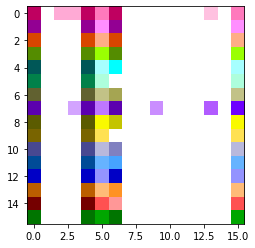

unit_time: 6.841367810964584
12856
unit_time: 0.017512068152427673
22
unit_time: 7.345082998275757
13407
a403231af35e318105416ee77b0086904d4a9cbc9538faff355be545f521c589.csv


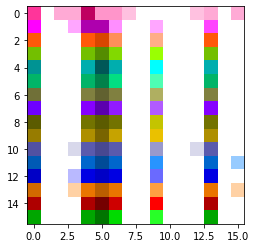

unit_time: 0.011201933026313782
3
unit_time: 0.0030894428491592407
19


C:\Users\cherry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (3,6,8,12) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


unit_time: 7.523230314254761


C:\Users\cherry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,6,8,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


65848
a4052d6f8898ee49a64319ae7ab1bc20ec401e4ff853b51d46226dabf5ea5e21.csv


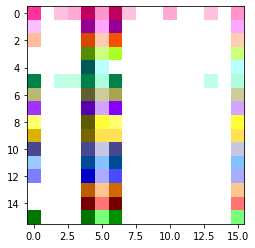

unit_time: 0.007955119013786316
12
unit_time: 7.468452870845795
16222
a4078f7fe9ddfd9458eb52fadae17c6a1056f562919d04ed3a0efeb14162e483.csv


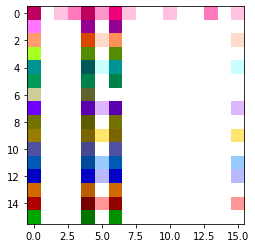

unit_time: 0.01728425920009613
22
unit_time: 7.517983317375183
12960
a40914bb95870abdd47b8b54b28b077261e74a13e7bb888d50d8d92d4e4b9caf.csv


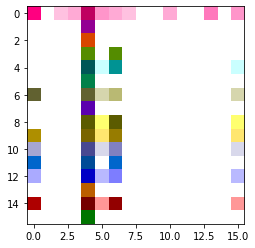

unit_time: 7.577550932765007
22954
a409b5ba8eb9d28b865d267d5c4271223430109f8d76052be4555ca7bbdbc714.csv


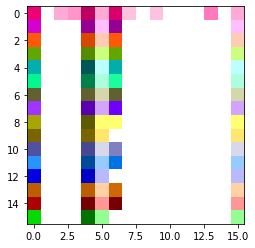

unit_time: 7.533068507909775
25003
a40b76a9f6a0296fea0d43f5796e33cdba1dcb03f327d08658e572e35c196b7f.csv


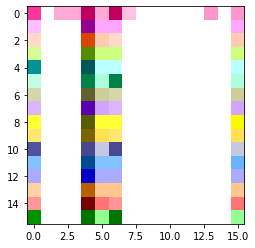

unit_time: 0.002781003713607788
3


C:\Users\cherry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


unit_time: 7.5880448669195175


C:\Users\cherry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


193173
a412d96c84cc784226270c26c1f5912aa3922b427c0c21f55a0bcf209f0d16e7.csv


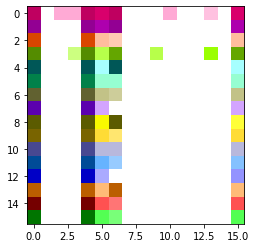

unit_time: 0.015703365206718445
33
unit_time: 7.645029813051224
79882
a416ac4f276fcc8ce192864eef0d0f0e52dd81a364d43faa067c9c131a8b8085.csv


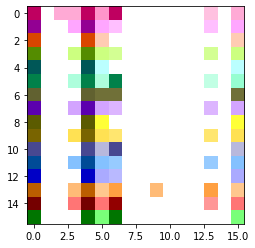

unit_time: 7.496876001358032
62250
a41786259f4b3c995c357d350588d9b3379c9d29eb5e5a6a26b71b51aaf2c6f1.csv


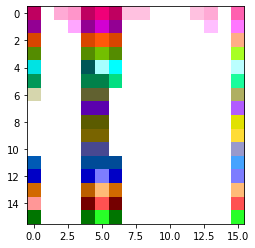

unit_time: 7.660736441612244
30419
a417c2b131c17bc7a492adbee022a42139f7a7a591ab956f8f958b085d01031f.csv


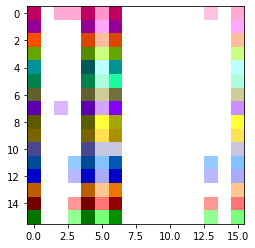

unit_time: 7.013750001788139
70909
a41843dafb2b1ae7d96f6b99ff9f8265c5f085c26fefcd21c6f1f1c9ec6126e2.csv


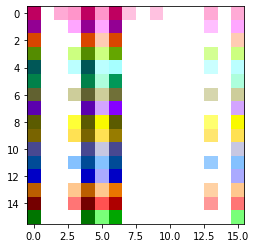

unit_time: 7.472338497638702
22010
a418f2afe5eebfac03bab52aa7fa525c911afaa3a996ba72b4076692580193ae.csv


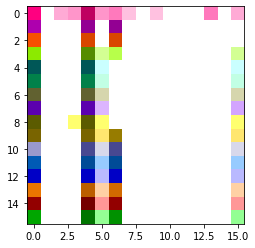

unit_time: 0.004465445876121521
3
unit_time: 0.010307759046554565
3
unit_time: 3.952733501791954
6849
unit_time: 7.543568387627602
85884
a41e593d0052484078dffeaaadced5856543cb713d6a39871dd03329eb26cb65.csv


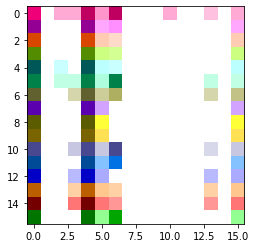

unit_time: 0.009973183274269104
5
unit_time: 7.764626815915108
78953
a42182d928dcb62f195bea45aa6bc62636031cea673f8e506747c259eeeefbd3.csv


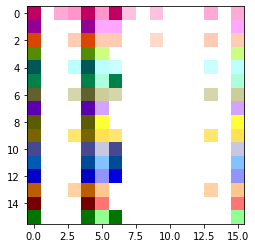

unit_time: 1.0223039388656616
8959
unit_time: 7.551171004772186
107573
a421bfa33818e3762e245d39ac7ef722c3dadae36f1e41e30e37a49950c78a32.csv


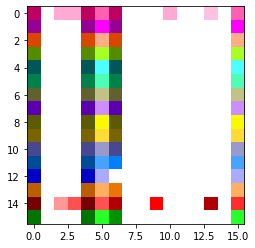

unit_time: 7.570201247930527
65297
a42433cfaaa4b74900c4f4239f2a663c3a717c13daa7dd3a915e0e58510e589e.csv


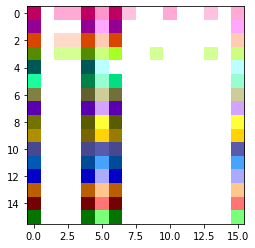

unit_time: 7.5685413628816605
55766
a424e519f2a9d270c4f99b9d6ef76457526329e9dcfd29d2c763337292a16dd9.csv


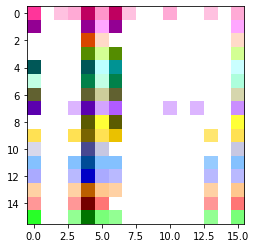

unit_time: 3.5619610100984573
21648
unit_time: 7.464689120650291
23352
a4260d941e01ea067ec5bb7396d7490aedb601d443559cdc3a6c90689ef3b401.csv


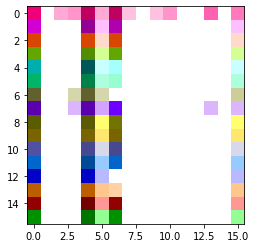

unit_time: 0.0016530007123947144
3
unit_time: 0.005084678530693054
10
unit_time: 7.545865178108215
12121
a429db1861831d88d0eae4b291d21c705796485628445bbc72588afd188afb97.csv


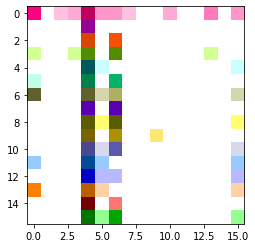

unit_time: 0.0012773722410202026
5
unit_time: 0.002255946397781372
4
unit_time: 0.01187443733215332
6
unit_time: 0.010555624961853027
3
unit_time: 7.582068502902985
52584
a42d1469a23b3c92718e4c153e8d3f1c2d3b6e376376f5d3b9df4230cf4bf6c7.csv


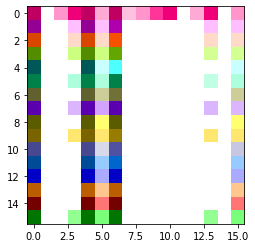

unit_time: 7.481466069817543
64602
a42d28c9e8bb6f1f5428ac1bff400daf59862fd778cd15c801a122fad0cff175.csv


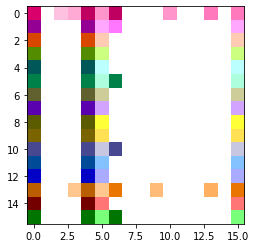

unit_time: 4.640119448304176
6590
unit_time: 5.814943432807922
899
unit_time: 7.4897250682115555
14135
a42fc7665121180e552d31d9308a2c84185f583cb2984ca44f49ce68ff9bb47c.csv


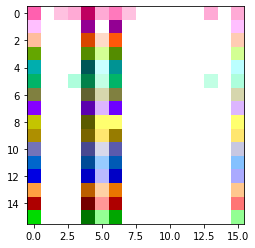

unit_time: 6.888141870498657
145
unit_time: 7.504341810941696
28022
a431d7f2f678d741889127ddb22cede6c44f8c3a251e57db27c532bbc849999d.csv


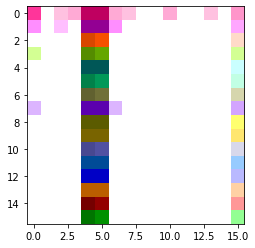

unit_time: 6.872387066483498
36552
unit_time: 7.530518755316734
83957
a434a093d779f5f77f58c5f5ce251cd35deaf053a44b5313cf3fa0584311a440.csv


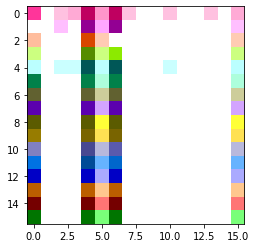

unit_time: 7.554619684815407
37025
a435a98bf7ead13b1c29358b5a165dd5f749b03dfd92f23e32ec121d460212e5.csv


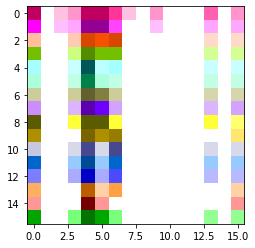

unit_time: 0.6324999928474426
5437
unit_time: 6.671567320823669
121
unit_time: 8.021205432713032
27722
unit_time: 0.02968880534172058
22
unit_time: 7.5116153210401535
55444
a439e2c0e9f8334686810aff0f17688a8b0c9c350deabb3ff2074f96606c3870.csv


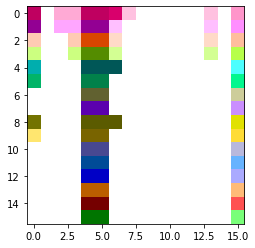

unit_time: 0.005150496959686279
10
unit_time: 7.496264010667801
53853
a43db2b0a9d04f71d374bad2ad9f0dfaa90b7d51d8dde10632356a55e84c7fdf.csv


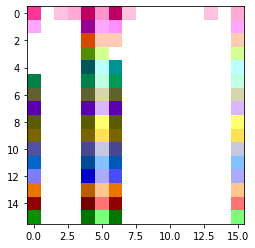

unit_time: 7.285396188497543
8265
a43e235a27049cf806fdcb3a2f834fc6e185ef901a063c717b7c79865c42c07b.csv


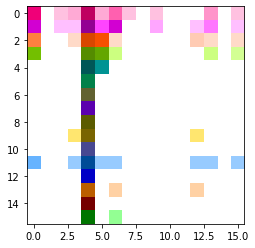

unit_time: 7.714759811758995
49268
a43e60965d3914df9280415764bb333f0e8b54e417d243a506f4e871579b3584.csv


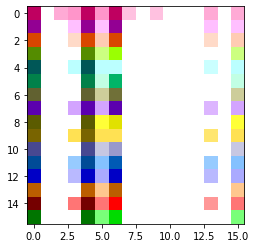

unit_time: 7.573036938905716
47673
a43ec329bfb9679cfe41ff665a3e2f120b8bb013dc62c9bf9aba07eacabbd2a8.csv


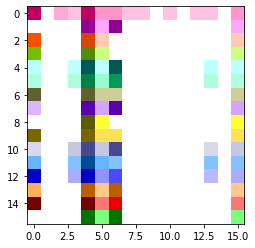

unit_time: 7.6271669417619705
105948
a43fe4bbd577b481b96ad16319bcac839b2b6059bb36fcce059bd4273ff66aa1.csv


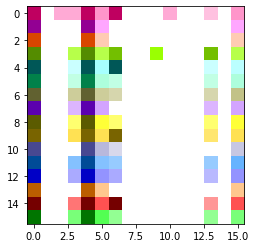

unit_time: 7.605099990963936
18139
a4418c103c9da04e870d76510a29c12fe7e530d207b6e8de900fc852e2b227da.csv


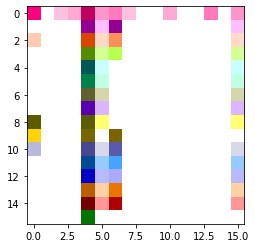

unit_time: 7.6154944896698
21164
a441fe4a949e754d696176ab0972be0664d87f63fdd0f3f7a903985b39116e92.csv


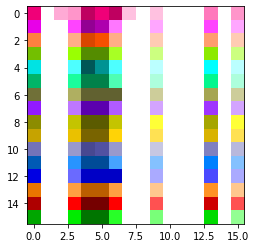

unit_time: 7.549646690487862
124177
a4420d100a73fa5c16f8d79ca800a6effd982dbfd91f6909e9877573ffd5298d.csv


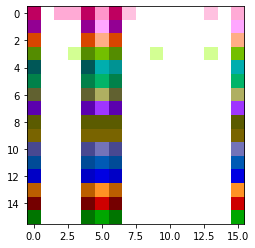

unit_time: 0.007665187120437622
18
unit_time: 0.012252181768417358
10
unit_time: 7.551136314868927
43250
a444334b5d0853f4a2bfb8585004d641c265aeec2d53c5bcccd9f19fd390d219.csv


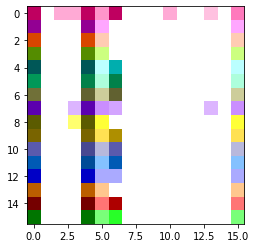

unit_time: 7.401875004172325
150419
a44589f6705fbfea8a17066e878f3bc7936347c273125a8330aff354328c8043.csv


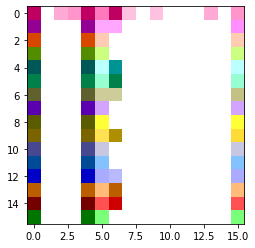

C:\Users\cherry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (6,7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


unit_time: 7.494911998510361


C:\Users\cherry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6,7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


98965
a4467194d0e372640f6e98bd34243394d7ba129e2074643d67dabe84bd1951d2.csv


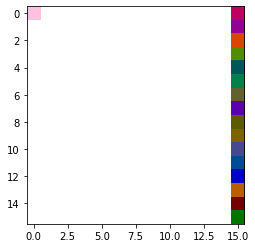

unit_time: 7.5098429918289185
116292
a447e2a5ec7802b708c753c42b19cb939a4ac7e9b5a9ce71d7cc5d33e5f15461.csv


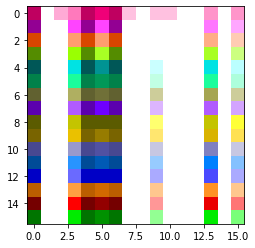

unit_time: 4.200304821133614
4485
unit_time: 7.498398572206497
44673
a447ee16b51e07a0c1d32f7d884e878b471934c830a91c135e3d5ed2072e2669.csv


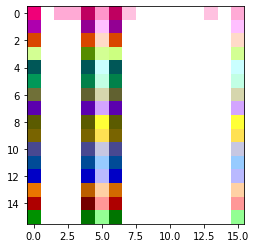

unit_time: 7.510214373469353
34778
a448a8b8fd5a7fa0663132ef49e9ca779b87ba19098e1463c9fd833399467364.csv


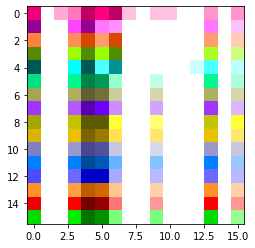

unit_time: 7.600158244371414
36245
a448e2aba2801715d8382cbb409d03862d5970f46edc8082d8cf9308a9082d5e.csv


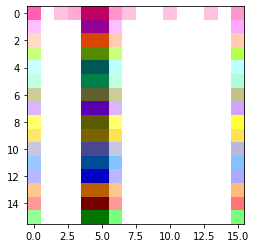

unit_time: 0.001806497573852539
12
unit_time: 0.0050811320543289185
3
unit_time: 7.552073493599892
101829
a4507768a16c3f65647b05ab1b7e6bec8342e2f969974ecb04eacc4acf93368d.csv


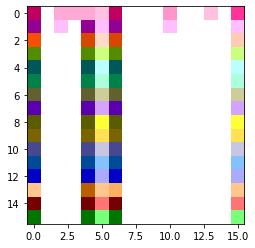

unit_time: 7.560109868645668
31894
a45175be70bacca70818686e31df05a9debc08837ee5aaeaccaba44159ff5203.csv


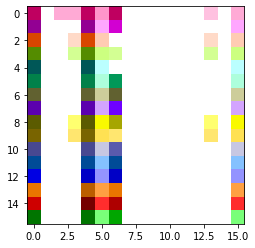

unit_time: 7.541714504361153
45552
a452e59bb48fa8c1e15aa97e0b660847769acf9c214a95d289660deb516341dc.csv


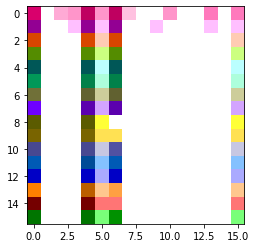

unit_time: 7.5436291843652725
95802
a45330847212bdd3206db799147dc384db6b022725de998bf8cc30a1d1123690.csv


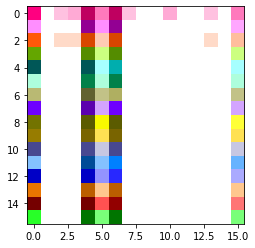

unit_time: 0.002032563090324402
6
unit_time: 7.553428992629051
178723
a456bf826770a69b8eb011179d80449dd5cfe819d8d6477326f8fa9363a8436e.csv


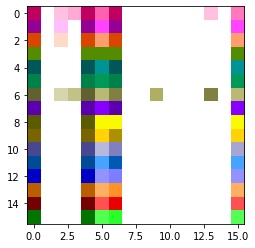

unit_time: 7.60805968940258
37180
a456e7a6f7dbeef8c09a1c2ffc07c8724f37926b9855f870d6a987318e45bf2e.csv


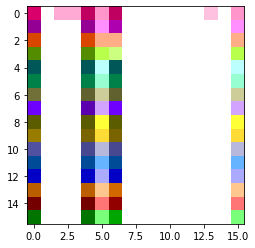

unit_time: 0.003395676612854004
10
unit_time: 0.008319124579429626
3
unit_time: 7.177929371595383
13557
a45884d60a8eef446e83027a237428caeecd52188f19eca4fd991416cd122a3e.csv


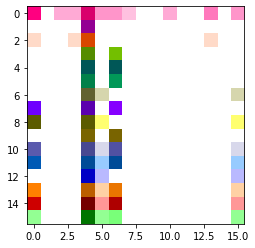

unit_time: 7.714991569519043
131
a458d7a3541adbdf8290f255369dfa2b2f22c85a7fce7cae45c9b5a91c9ccf4a.csv


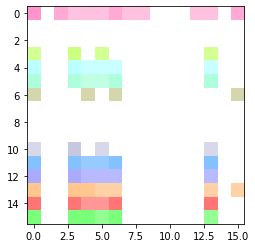

In [9]:
# family: Mirai
# 特別挑選 unit_time 介於 7~8，是發現這個區間的圖案較相似
count = 0
unit_time_list = []
image_list = []

for file in family_dict['Mirai']:
    counting_matrix, unit_time = extract_API_seqence_to_counting_matrix(file)
    sample = pd.read_csv(folder + file)
    print(len(sample))
    if unit_time >= 7 and unit_time <= 8:
        print(file)
        making_image(counting_matrix)
        img = making_image(counting_matrix)
        plt.imshow(img)
        plt.show()
        count += 1
    if count >= 50:
        break

unit_time: 7.397524431347847
39548
a400888f9d26d438842fd002feb263e05ca4e259f3cddd455c600bc4a0daf191.csv


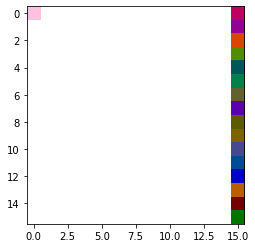

unit_time: 0.088777557015419
981
unit_time: 5.658130258321762
304
unit_time: 0.06222093105316162
364
unit_time: 0.007035806775093079
3
unit_time: 7.5368961840868
1442
a40e7f8a90d0a4d6d3694a1ae22c03e1a910ca46a8f1b41ea47634ec10a7363e.csv


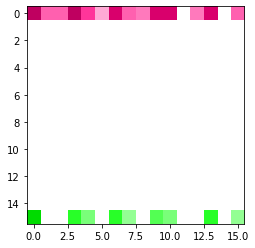

unit_time: 7.544850125908852
384
a40eeb13a867911a66760d8cf5927b3261e94e0e2e19fd400afa4a53a680c99a.csv


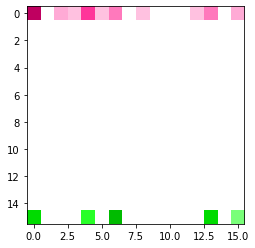

unit_time: 0.0013784468173980713
5
unit_time: 7.538964122533798
48763
a4135e0904a863a3d1d9d45bc78bf8025cab68846fe315a389476546f278b7b5.csv


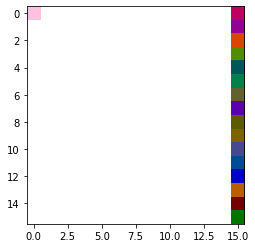

unit_time: 2.367972880601883
32185
unit_time: 6.580802366137505
66
unit_time: 0.04472781717777252
114


C:\Users\cherry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


unit_time: 7.537473693490028


C:\Users\cherry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


106024
a420a78b4adf8b69e98b0bd37d82ccd3bd1d640619becede25f2b0c42c68bf14.csv


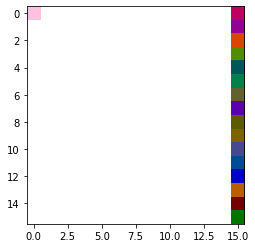

unit_time: 7.172743618488312
52266
a425dc06e293ebc32283e9815dd0e26c0b53c0663b12d85394147748a7e0fff5.csv


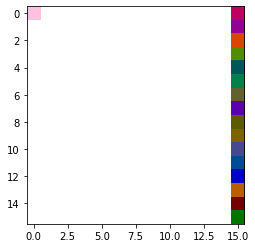

unit_time: 6.614269882440567
315
unit_time: 0.6291806846857071
3996
unit_time: 7.404500752687454
27923
a42c99f10747ed29963d6365c150c44531d20404157e32f5df4ec2c28ad39f6d.csv


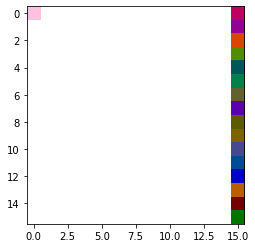

unit_time: 6.6318357437849045
318
unit_time: 6.900356933474541
186
unit_time: 7.553624197840691
78796
a4333b5593a270952b5594f4abb6b0c889b9444b21541c2cae0530ca92d1f6da.csv


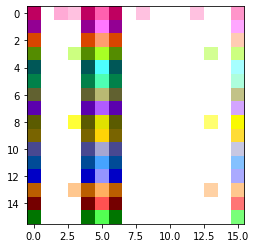

unit_time: 6.7784896939992905
311
unit_time: 0.02562500536441803
316
unit_time: 7.451922252774239
32191
a43cc98a8f9b285a689e37d937dde2d1bf0325f2b2a2374e85fe9914fc28d95e.csv


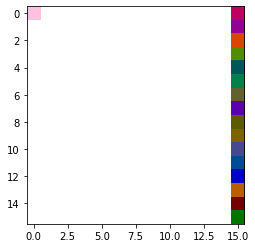

unit_time: 6.515203446149826
50
unit_time: 6.577046886086464
66
unit_time: 6.625037387013435
318
unit_time: 6.867959126830101
2506
unit_time: 6.591373071074486
315
unit_time: 4.407250374555588
308
unit_time: 0.04651637375354767
412
unit_time: 6.655206128954887
66


C:\Users\cherry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (6,8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


unit_time: 7.645768880844116


C:\Users\cherry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6,8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


107222
a44a63bd380ca9f7b0223b4e76c4b55524b35ca459e630d1193b27f8bc456c77.csv


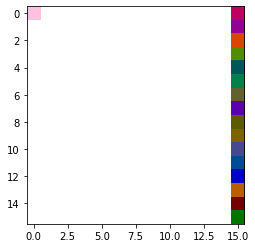

unit_time: 0.28243687748908997
335
unit_time: 0.1375315636396408
1340
unit_time: 5.637750253081322
35
unit_time: 7.502977624535561
81997
a456e70c5692432b5077f1acb71e3110a0de0561429fdaebe89f0fc2b52e6444.csv


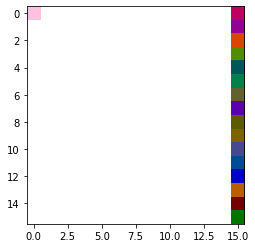

unit_time: 0.001641690731048584
3
unit_time: 0.0008833855390548706
3
unit_time: 5.6541943699121475
304
unit_time: 0.1286058872938156
129
unit_time: 6.589542999863625
315
unit_time: 0.03501863777637482
316
unit_time: 6.590142130851746
331
unit_time: 5.815735936164856
312
unit_time: 0.40263088047504425
8297
unit_time: 5.664344877004623
304
unit_time: 6.61106750369072
311
unit_time: 7.14185893535614
51550
a477a3882a472391dfc2184e2da4f9cf9a80e8d5098c79f76f9edcdd7ab5d640.csv


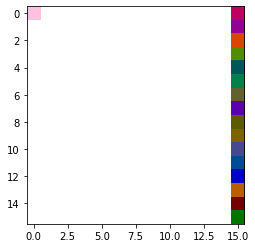

unit_time: 3.7688156217336655
302
unit_time: 7.433369621634483
46803
a47d574ec06abaf07f7cb80aefc282e5875e1c55dc9351a619b0130048933929.csv


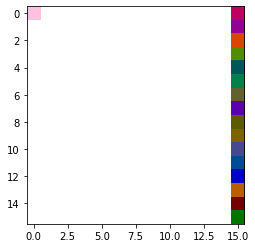

unit_time: 0.014417633414268494
334
unit_time: 0.02348943054676056
336
unit_time: 6.589318558573723
66
unit_time: 7.522480756044388
104650
a481ca158d68620df6d753376d50ad66cc1b27fa721ee1f0d4734049ee8de5c9.csv


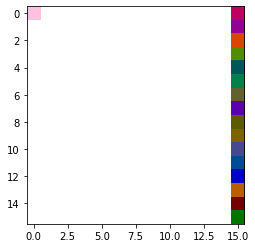

unit_time: 7.337721049785614
335
a482cec650860e6e28e4f6833acfbf65eb428191ef82d663c1d8af8a681f0773.csv


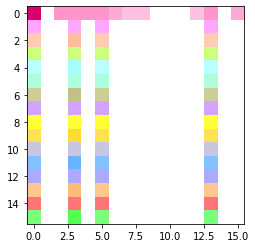

unit_time: 6.603141941130161
66
unit_time: 6.620871752500534
318
unit_time: 7.657189056277275
41523
a488ec7bd07d2e116e68a73fca3dbfd2fc2ab236164429826376e9cbd82905c1.csv


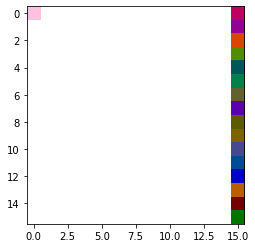

unit_time: 6.581236317753792
315
unit_time: 2.9603538811206818
4436
unit_time: 0.07478475570678711
316
unit_time: 0.013840749859809875
341
unit_time: 6.602670192718506
318
unit_time: 6.615775495767593
329
unit_time: 6.580124989151955
80
unit_time: 6.695546120405197
322
unit_time: 7.502515867352486
109242
a495caf3a467eb638eaa165617a66f1f85cebb2e5bc9946850f019af3fc6727f.csv


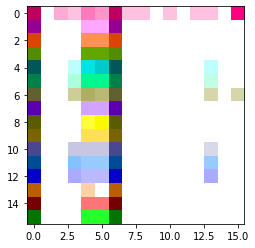

unit_time: 3.774000823497772
321
unit_time: 6.59319868683815
315
unit_time: 5.831480488181114
312
unit_time: 6.5756676197052
66
unit_time: 5.6575146317481995
304
unit_time: 6.592670127749443
315
unit_time: 0.0063225626945495605
16
unit_time: 0.10841651260852814
1012
unit_time: 6.5835118144750595
309
unit_time: 0.018797889351844788
130
unit_time: 7.526251062750816
372
a4adb882d80522b649a47fa72e80d778d2834305348509f63c33a7c409812c93.csv


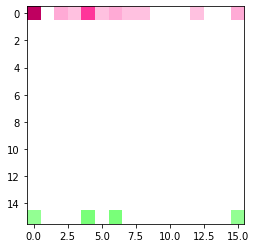

unit_time: 0.004225432872772217
29
unit_time: 7.474863186478615
61432
a4b75a028cec939b021e7330c2fa0a519b6f3a5050f7edf17f265cf2fcba9a77.csv


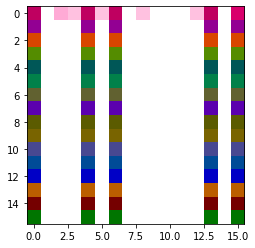

unit_time: 7.467344626784325
5695
a4baf38c599d664094677b2af8d6a077b927d8de33299e97321338adfb0c58f4.csv


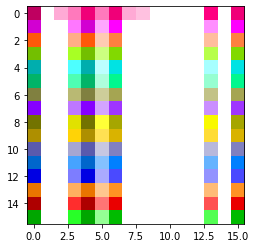

unit_time: 5.784098371863365
300
unit_time: 0.040033429861068726
334
unit_time: 6.591125503182411
329
unit_time: 5.726249992847443
1094
unit_time: 0.020448312163352966
334
unit_time: 7.1343666315078735
1743
a4c7bae681a80fbc76143a50ae71a801200fde6bcbd6f9cf57fe8cfe0c49a83c.csv


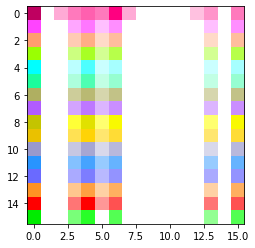

unit_time: 7.562011569738388
93009
a4cb3c14849aeb90fbde6b21616e2ab4dde9e4bee81e017722aa564194db19f7.csv


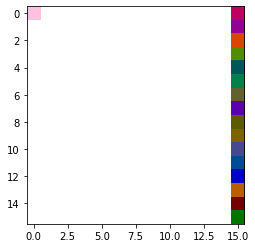

unit_time: 6.605487942695618
315
unit_time: 7.497345060110092
44299
a4cf87355b1c5eabc634498fd20ecc536cc94aeda29eddeba06327b963504e00.csv


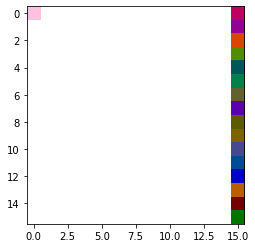

unit_time: 5.8086818754673
310
unit_time: 6.591105684638023
315
unit_time: 7.505896240472794
318
a4d59a4845745c0585f56711a2c8573676768a51c198ab54fb950d59c1fcf782.csv


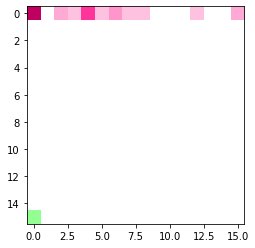

unit_time: 6.603054881095886
315
unit_time: 6.590002253651619
350
unit_time: 6.286852568387985
363
unit_time: 3.9013931900262833
490
unit_time: 6.601613439619541
318
unit_time: 6.612603813409805
315
unit_time: 0.10913680493831635
129
unit_time: 7.464870929718018
103956
a4e11a04daa9e9ff796d4cdfaf6ccc8e5de203a218d3186af8f89d33ab6b8887.csv


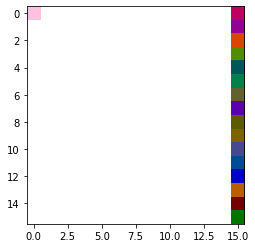

unit_time: 7.278584569692612
2070
a4e1b876b19d06d30c890a9b4036d40d7971fa5758caaa795e546a9caf4c6fe1.csv


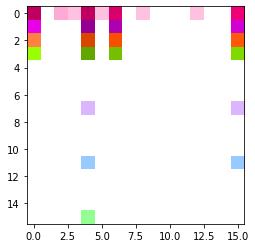

unit_time: 0.07607825100421906
665
unit_time: 5.767468065023422
312
unit_time: 6.626967437565327
315
unit_time: 0.027500003576278687
334
unit_time: 6.604193076491356
315
unit_time: 7.527844309806824
310
a4e9a63ea837291a08e65b733d4c7474f335007b6bb8e7a7d511b6845b452fc9.csv


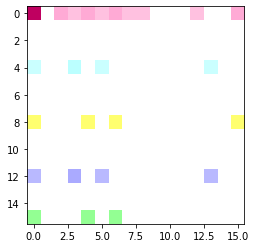

unit_time: 6.622146874666214
318
unit_time: 6.609245866537094
318
unit_time: 0.09865237772464752
366
unit_time: 0.03808043897151947
317
unit_time: 0.09195637702941895
385
unit_time: 7.549802511930466
308
a4f2c430c77274b37c41e132232b746bb862d44770fac7297bba684023cf0424.csv


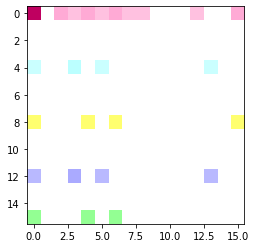

unit_time: 0.03687293827533722
318
unit_time: 0.012693926692008972
35
unit_time: 7.486806616187096
80552
a4f7e3010b8ece4643b0d1dbf477459d41e9a2b5f7b5926e52f9172047d4c724.csv


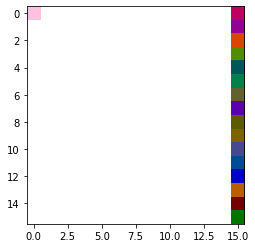

unit_time: 6.614122994244099
315
unit_time: 0.008125007152557373
106
unit_time: 6.5884605050086975
318
unit_time: 3.9304071813821793
3331
unit_time: 7.467525944113731
95557
a50072afc4e8793d1398325e1b57adc392fcb0cc9ec28ad772819299b6752813.csv


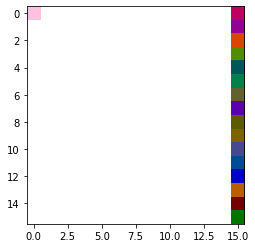

unit_time: 6.608245626091957
322
unit_time: 7.53388275206089
51854
a50359a28470e0bb12540532f96dc68b2c27be3290127b9c4a3e2724e44ecca8.csv


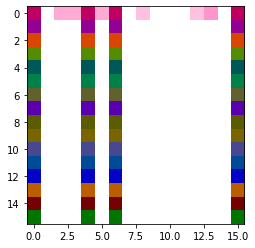

unit_time: 0.001964256167411804
3
unit_time: 0.19545193016529083
1058
unit_time: 6.317122995853424
365
unit_time: 7.444713741540909
55548
a5103c8c953dd9fe34cd4424e1e96f63c9babaeadfdea52858e2a06bf49a094e.csv


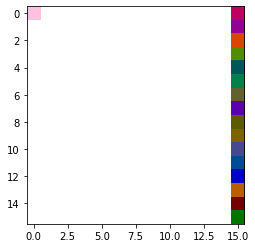

unit_time: 6.505678310990334
364
unit_time: 6.5815165638923645
66
unit_time: 0.1837315559387207
1300
unit_time: 0.03978051245212555
320
unit_time: 6.61247656494379
315
unit_time: 0.012380316853523254
6
unit_time: 5.6509778797626495
304
unit_time: 7.987331934273243
47908
a51fcfa6b08a05f86a60d6b45f88d77f0d779233aff7aff194d1ab1fc13df36b.csv


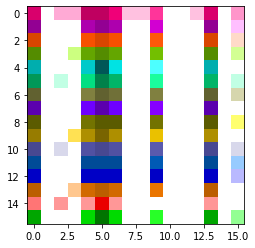

unit_time: 0.0025855600833892822
6
unit_time: 0.01997368037700653
316
unit_time: 5.666360691189766
310
unit_time: 7.567692190408707
64959
a52336e4b5f3e01236a93fb6296607fdda7f44a933a17184dd3004068fa04998.csv


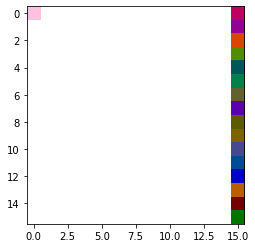

unit_time: 6.606180116534233
317
unit_time: 7.600227132439613
33526
a52526ecd009a3899d901b705509fedf7ebd79c862ee5aa6c8698d88cbd41410.csv


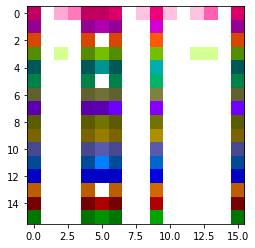

unit_time: 5.674468249082565
310
unit_time: 7.460330739617348
35755
a52a64d6c6729d592954881f96da464923923fe88c3716f206448d42932a3116.csv


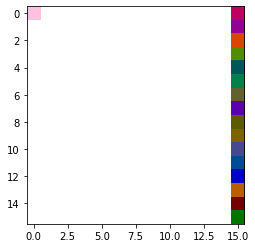

unit_time: 0.018992558121681213
125
unit_time: 7.164010256528854
382
a52df59e5950fd73216740dfa8a245042400f1aca615818b9f858249f9795c7b.csv


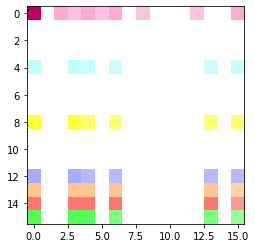

unit_time: 5.655975505709648
310
unit_time: 8.500769942998886
56493
unit_time: 0.03351987898349762
363
unit_time: 6.6094009429216385
315
unit_time: 7.523555561900139
43769
a5449d7a185741beb4d1d73d7f2cffc6de75908f3a2544089a8da2a86891a090.csv


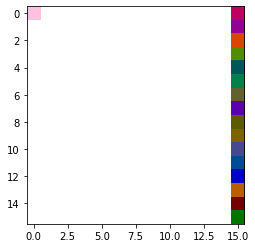

unit_time: 6.618648439645767
315
unit_time: 7.539900749921799
399
a54be5104c8283d128d2e19c3b23d8ca23c9fb2ccc88a02ac7cce88878b9ef79.csv


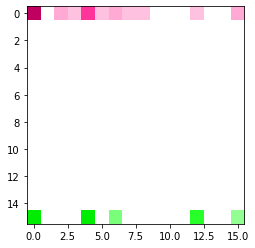

unit_time: 0.03008750081062317
111
unit_time: 6.5855534970760345
318
unit_time: 0.11819081008434296
1324
unit_time: 6.619615882635117
384
unit_time: 7.444193318486214
49581
a56474d6457c879e08b17fa74214fabaa2773105fc3412e243bf84b60553ae4c.csv


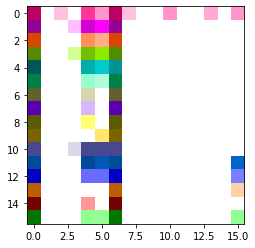

unit_time: 0.2289586216211319
1301
unit_time: 5.954093500971794
46484
unit_time: 0.001042872667312622
3
unit_time: 6.616491690278053
315
unit_time: 6.588697120547295
315
unit_time: 0.05657455325126648
299
unit_time: 7.516004949808121
381
a574726cf0ae5075c41e9be24947665a80a751b556932cdca627e6ff5820b067.csv


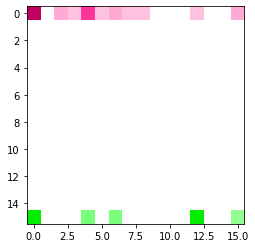

unit_time: 0.03019256889820099
316
unit_time: 0.018854737281799316
316
unit_time: 4.066452816128731
7226
unit_time: 3.7813073843717575
298
unit_time: 4.530790746212006
312
unit_time: 5.121250003576279
26278
unit_time: 0.0015196800231933594
3
unit_time: 6.583787381649017
66
unit_time: 3.7724293172359467
364
unit_time: 5.846781626343727
312
unit_time: 7.362037003040314
234
a585c7e9fdc5f0b29a654a5f8614f84cb01501435e6914319048bad9ab1b3173.csv


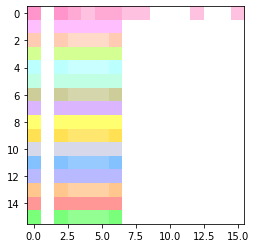

unit_time: 0.0017366856336593628
3
unit_time: 0.03921893239021301
334
unit_time: 7.460274502635002
4306
a58c588f2f55de10a21235b7da94ca85595aaa241f785a832ed0a1b989ebcd94.csv


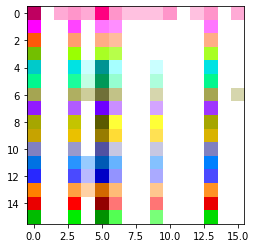

unit_time: 0.28622931241989136
921
unit_time: 0.33201393485069275
572
unit_time: 0.007527440786361694
93
unit_time: 5.6468749940395355
362
unit_time: 0.08018124103546143
120
unit_time: 0.013078689575195312
335
unit_time: 6.681220814585686
315
unit_time: 7.538314372301102
42135
a5990cebd1ce171f8d89dab2b2aec296ab71ab992618a964779c1c3a9e87604f.csv


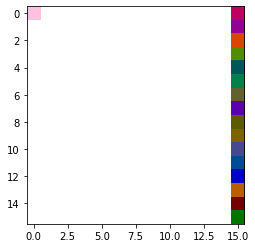

unit_time: 6.6095323115587234
329
unit_time: 0.021745815873146057
38
unit_time: 0.23668062686920166
407
unit_time: 0.021622061729431152
334
unit_time: 6.5939056277275085
315
unit_time: 0.06783518195152283
662
unit_time: 0.015794813632965088
325
unit_time: 7.491895258426666
13545
a5ab358ef1132c02d7e68bd325ff780e713f0480ba422bc9fa65d79e1dce8e1d.csv


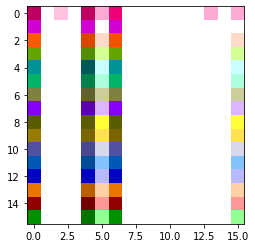

unit_time: 6.592079058289528
321
unit_time: 6.61357644200325
315
unit_time: 7.557644993066788
59535
a5aeba0f67a4cf8cc6c641f7816ad432f9f61f97aeb4263db6e7f3942c91b872.csv


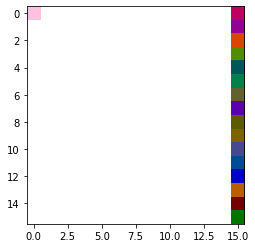

unit_time: 0.05494168400764465
448
unit_time: 6.58660888671875
311
unit_time: 7.475499242544174
99273
a5b476f549276c247ba5b0df0eb7b580f53e60fb014911a208007925588e6986.csv


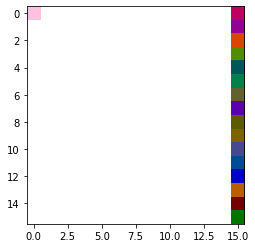

unit_time: 7.492713198065758
44803
a5b4d4cc4fa5dc209456e5948579c9bb6556d3788e8c6cf3222c9dca97676b84.csv


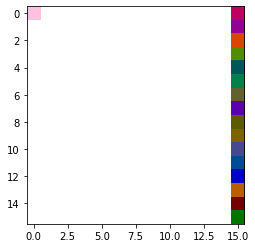

unit_time: 6.593352869153023
322
unit_time: 7.469120681285858
48982
a5b5a5097f574678d9afcf4910e11ebecd6dd89a4b9abc01a749618b11150b58.csv


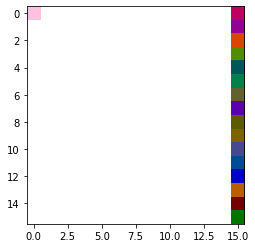

unit_time: 6.2680138647556305
20010
unit_time: 6.5802056938409805
66
unit_time: 6.595375552773476
315
unit_time: 7.247980818152428
45259
a5bce9d9725777ab08497608e219ccdb39a5e434724b1111f58f5919213688c6.csv


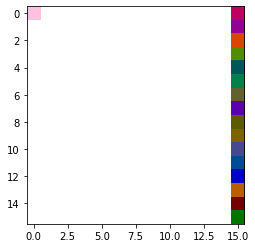

In [10]:
# family: Bashlite
count = 0
for file in family_dict['Bashlite']:
    counting_matrix, unit_time = extract_API_seqence_to_counting_matrix(file)
    sample = pd.read_csv(folder + file)
    print(len(sample))
    if unit_time >= 7 and unit_time <= 8:
        print(file)
        img = making_image(counting_matrix)
        plt.imshow(img)
        plt.show()
        count += 1
    if count >= 50:
        break

a411276a26f4580489f5500ef666df1fa402548af2624848052670c822e89cc4.csv
unit_time: 0.0011403709650039673
a419e478003b1db9b455019c39cffbcb71d0cd5030a732360dbd8f216acc4065.csv
unit_time: 7.3859578743577
a43043f2dc746d5b83f5b34703ec5fb02c28c08a44bf0dd3495cc2528fae279f.csv
unit_time: 0.001285552978515625
a455e0625bfed2fc1a4eaf243d7635095bf54f5bde960b3b297521b5c875e657.csv
unit_time: 0.0008500069379806519
a465655496643d17a351258addd8bf9c907f78955b392ee71bf938610f9b7236.csv
unit_time: 7.489653751254082
a473d0de3441249d3cbfcfbf85092fc1b6f6c707bb14752c4569fe5cb6e60ca8.csv


C:\Users\cherry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


unit_time: 7.57111032307148
a484e777fdb847764899abd5ee067cdf7db7e24b3019f378a7bce41bdf18c1b8.csv
unit_time: 0.0018398761749267578
a48967d884fedb7864fde602c5fed53c942fb5586b56fbd0aa610b106b58c6f4.csv
unit_time: 7.21875
a4db4d56ae45c93ae2e52ccff8cbd431e67f5dfacc5abecaa89f919d185b74cf.csv
unit_time: 0.002509370446205139
a4e9d490b95931dcf1b5a48722691408b0fcb48ab36c5b9bf57be19056c092b9.csv
unit_time: 7.36171942949295
a4fd7383bb2a8fcff2bf8c7b93995ad074666c6d50870ba639acdcd41cae898d.csv
unit_time: 7.681241124868393
a50184163152ed4a45d3b95f38adbdbf9c4965b1b1aeac2829d54609604095d4.csv
unit_time: 0.0013666898012161255
a5191039f5307a56eb0a57e7e35e9da210ac529f81c0ed8b635bba8442e59cbf.csv
unit_time: 0.17169193923473358
a5485f7d873994fe1c0e39c05a27b857cdfc27c8f0e8e0115068b5d536bf318c.csv
unit_time: 7.4527698159217834
a55d45a70ccaef3faa0f7aaab750ccd0b71433a723d62f7d038fabe101838902.csv
unit_time: 7.475877940654755
a562f5ca90322dcbec459672bd23d11b1a0c99bfc7613ee4db72ec8deba0ba57.csv
unit_time: 0.00161

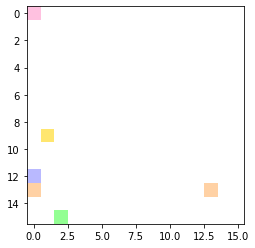

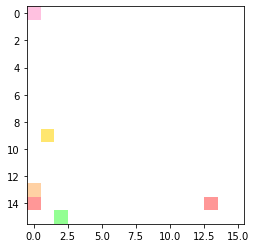

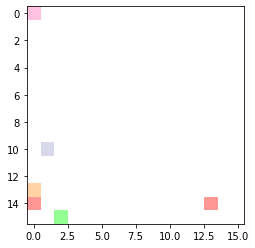

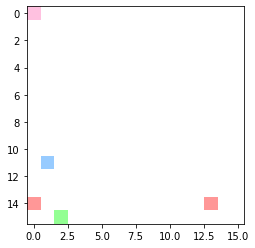

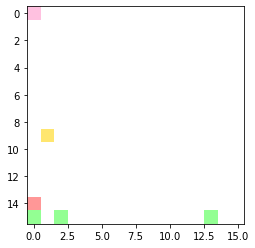

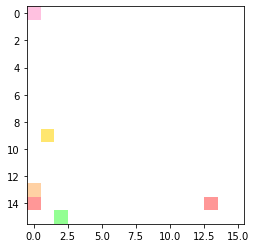

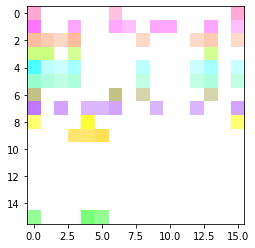

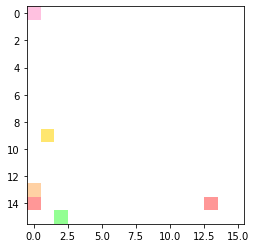

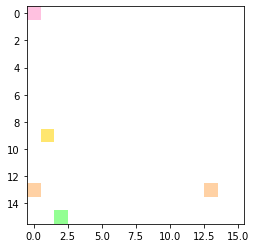

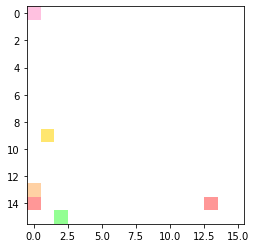

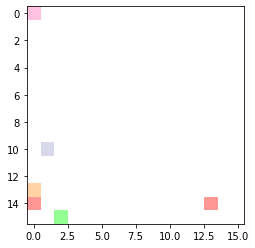

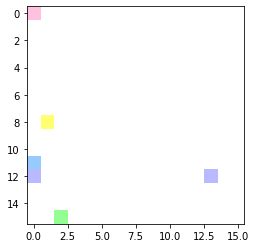

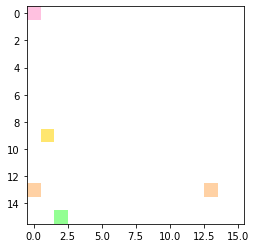

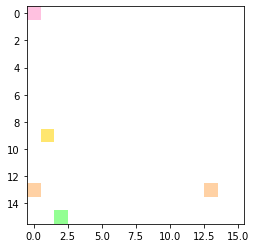

In [11]:
# family: Tsunami
# 嘗試用 unit_time 分群，會不會找出規律
count = 0
unit_time_list = []
image_list = []

for file in family_dict['Tsunami']:
    print(file)
    counting_matrix, unit_time = extract_API_seqence_to_counting_matrix(file)
    img = making_image(counting_matrix)
    count += 1
    unit_time_list.append(unit_time)
    image_list.append(img)
    if count > 100:
        break
        
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.array(unit_time_list).reshape(-1, 1))
for idx, label in enumerate(kmeans.labels_):
    if label == 0:
        img = Image.fromarray(image_list[idx], 'RGB')
        plt.imshow(img)
        plt.show()

a40066ed3d4c8851ccae673df21245be9b73edba60528908891b77915bfda1c8.csv
unit_time: 0.0013403147459030151
a41a829202b7ef1310f439567d69fd269463025d224aa583e2129e71c5222bdd.csv
unit_time: 0.007379636168479919
a42a7bd9cebbc1d8184667739cc50fda912df5bc78ce19cfc1fba120c2dc4448.csv
unit_time: 0.0007838159799575806
a49fd45037330ce1f8d32eeefac96aa2a91b38f9421f3502635a78448372838d.csv
unit_time: 0.006828561425209045
a4a1fe6dd6113c06a1b057ed6fec0543cb2f6b1f69790536452885d17dd9e2e2.csv
unit_time: 0.0014632493257522583
a4b9cba43b985a570f245109e16c7c8fbdefdd767f47612175dec1934d095df5.csv
unit_time: 0.009686127305030823
a4ce5dbb45b6d361def7c14e7b1ebf499d63df82dba4133ae758766d09b8502a.csv
unit_time: 0.001542508602142334
a4e9ab5cec3ff2071ce665b9603d7faf70d932de7fa3aa8c226757aed8e3da09.csv
unit_time: 0.024120688438415527
a4f36da60289ab2ff2305bb95fd501da48f21edb89c30347bd1dfd13f0449b21.csv
unit_time: 0.01869000494480133
a5051f78aa62c1454d9833709f624f287f12fc9050ee8cba01327f095f68cd06.csv
unit_time: 0.0060701

C:\Users\cherry\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


a5329afe4bdad7d13b668973c8f1de89d3831849296e65d90e2ff83f755c7a18.csv
unit_time: 0.02670024335384369
a55a82b0882e1cbaa3fe2a50ec5ef0c00598562d1ae3415951888077a57fe38d.csv
unit_time: 0.0007383078336715698
a565e15ab3946d19927130ff6b9b20565e7c97a679f464fa3b10649c3168f8bf.csv
unit_time: 0.0029280632734298706
a56c021cab7f355c7d9d32d2a2e0089d4fdcf37572d9557f8927e7faf31dd0db.csv
unit_time: 0.0006234347820281982
a59ae41c34111add9729a23c721cdffa237da0aabd3f6ec5ba3733c4dc6aedf4.csv
unit_time: 0.005691811442375183
a5a495da35380f3b01a452c4dfac45396aa46479c6cb7b7d17edc428f9ab259a.csv
unit_time: 0.001063123345375061
a5b25276709ac03fb431df1c3fcd16997fdcc0083ace41dc272a2b134964218d.csv
unit_time: 0.0011188238859176636
a5f2f85eb983e9ebef006e0b8674fe5afd70e8810f3e05d596dfe6fdc755d41c.csv
unit_time: 0.001406446099281311
a603d21da3b21b58f048d0f6f7e589769142be57934d6ef076e0d251a6700f07.csv
unit_time: 0.0008610039949417114
a6047191b9d6efc86d0b836132d3d4ed4d2e30f304f356314040157925662b08.csv
unit_time: 0.00516

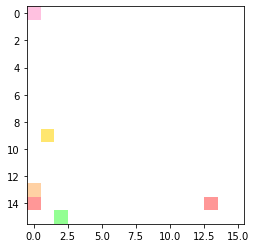

a41a829202b7ef1310f439567d69fd269463025d224aa583e2129e71c5222bdd.csv


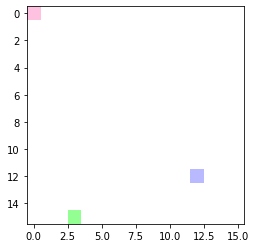

a42a7bd9cebbc1d8184667739cc50fda912df5bc78ce19cfc1fba120c2dc4448.csv


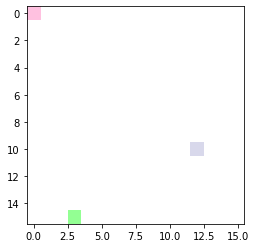

a49fd45037330ce1f8d32eeefac96aa2a91b38f9421f3502635a78448372838d.csv


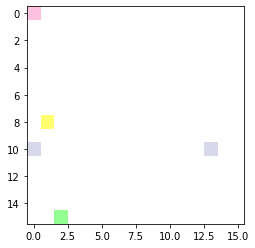

a4a1fe6dd6113c06a1b057ed6fec0543cb2f6b1f69790536452885d17dd9e2e2.csv


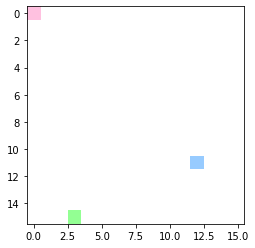

a4ce5dbb45b6d361def7c14e7b1ebf499d63df82dba4133ae758766d09b8502a.csv


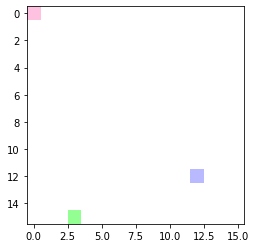

a5051f78aa62c1454d9833709f624f287f12fc9050ee8cba01327f095f68cd06.csv


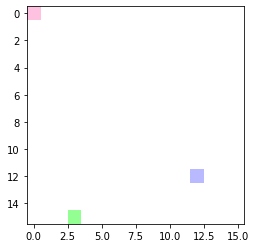

a50c338c682fae17222edf433c00fa7cdd8abb03a079316c049af5f8b6b5114c.csv


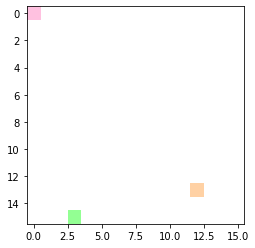

a55a82b0882e1cbaa3fe2a50ec5ef0c00598562d1ae3415951888077a57fe38d.csv


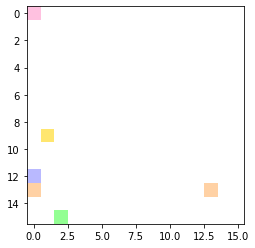

a565e15ab3946d19927130ff6b9b20565e7c97a679f464fa3b10649c3168f8bf.csv


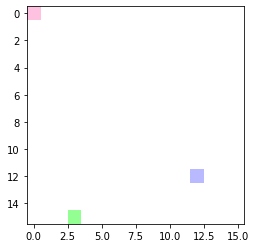

a56c021cab7f355c7d9d32d2a2e0089d4fdcf37572d9557f8927e7faf31dd0db.csv


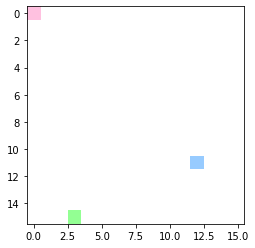

a59ae41c34111add9729a23c721cdffa237da0aabd3f6ec5ba3733c4dc6aedf4.csv


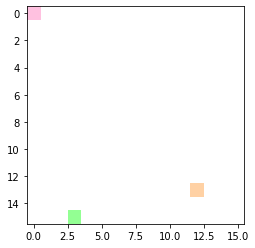

a5a495da35380f3b01a452c4dfac45396aa46479c6cb7b7d17edc428f9ab259a.csv


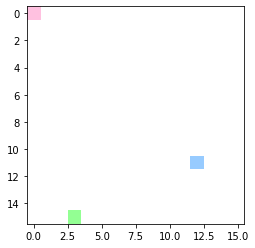

a5b25276709ac03fb431df1c3fcd16997fdcc0083ace41dc272a2b134964218d.csv


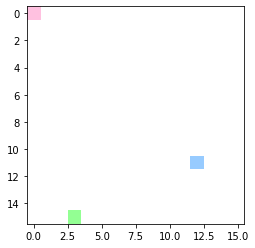

a5f2f85eb983e9ebef006e0b8674fe5afd70e8810f3e05d596dfe6fdc755d41c.csv


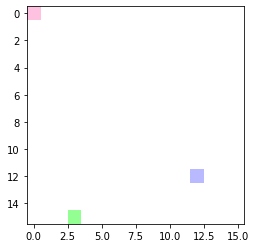

a603d21da3b21b58f048d0f6f7e589769142be57934d6ef076e0d251a6700f07.csv


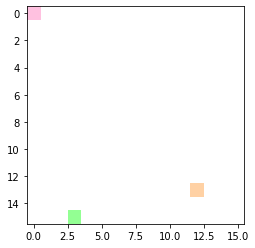

a6047191b9d6efc86d0b836132d3d4ed4d2e30f304f356314040157925662b08.csv


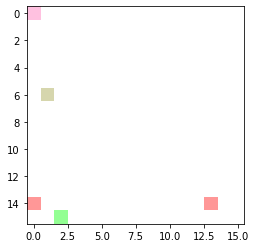

a61d027f4ce80b15489cebf3384921f3148cddf9572e4ba3272007dcf0ed22ae.csv


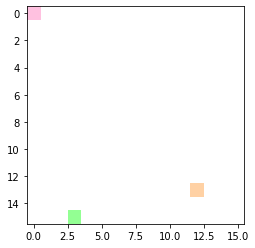

a628ab47924783a4aa952719f5234ab862d6d0bc717961286b6b5dd8aba282c0.csv


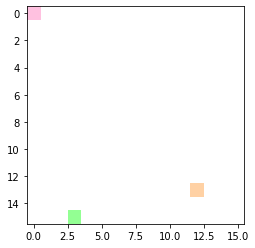

a62b952caa74fe91b6785fe740c53d4f30596e686f241094363c0f3871a0bd1d.csv


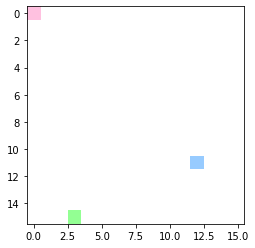

a63337566e67268a32354c741aa99d3f8fcdca1ad9b1bf6e83df5d0ce6cd55e2.csv


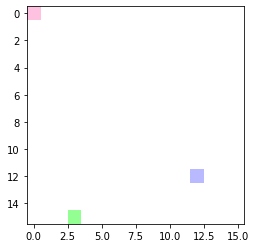

a6360ccc86c67d8b89f32125b131c7289f53b87c819ae85b475763201f5b4179.csv


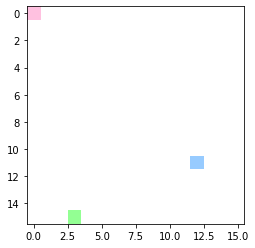

a64833c533ace2b16dc5d12f3867bffd8cc2f2a420007d9fdc936c8649951d65.csv


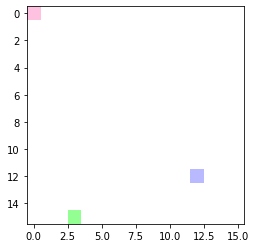

a666316af31c4d8d1d39e21155a97b5f9e75690cba6c8a7a8c5f2958f57432b6.csv


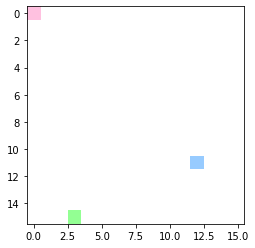

a666a1e04fd6001ab677ac97d363895e06bfca5331bc898252e9e5289b13e223.csv


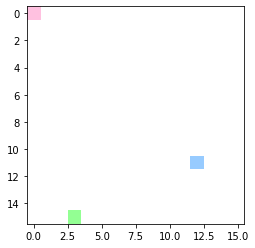

a66afbb9f496bf3b73848fb8ffea21f57194e4f9510c2407462fbcf4d089ede3.csv


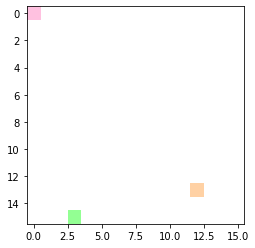

a66e59f4c4f28c12eac4e974c6a992f8a4cd2d1067d31d50f799f8e73868b675.csv


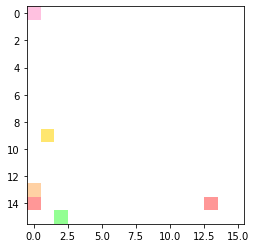

a66f4843cb0cf3b9d9c0d4ed58fe25e7da016513296fe40e987f50194d792795.csv


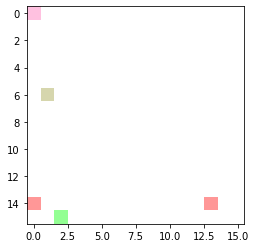

a67c13fb59079c947cf430d77eac268b9a84be129dbce82e209b6e9bf1e371f7.csv


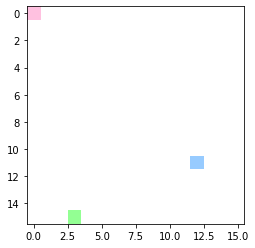

a6936802ad10e1f4eec8da9ea4179f0ef1ac9ffbb3a33e2f93c4336b44c4a8db.csv


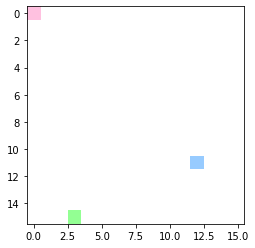

a6a6d4f0fce478f015625f2113183321fc3a10d23a85ed1d0b5bc096392d636f.csv


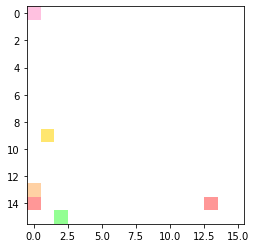

a6bb44527809efc54c8fc886bc4d4e36c94e78b1d7fc6f32ef0047b43eb6c48b.csv


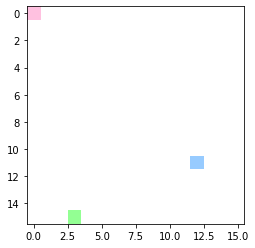

a6bfe1c736ef1ffb9344d3ad6bbfd8d12be2fc471c0c49fdd27af1f394714bc2.csv


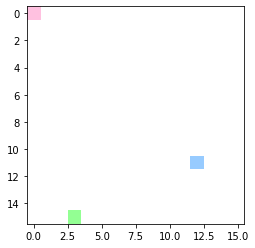

a6c2e619829a35517bd4e4e6fd5ed7bc59c275953414e5b6d0fcdc1f63339eaf.csv


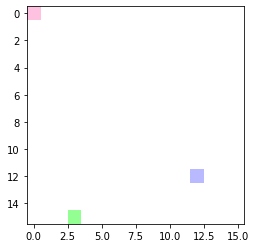

a6c454035976c57206a6dfe5c93cbf8eadf0ded12c5d81d10940d5c7a563197e.csv


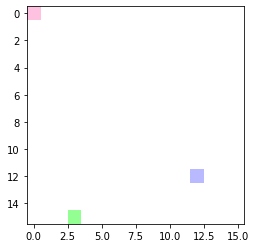

a6d3cb79183576d801b078d39530ff9cf737029a1d37395aee6d61c648dc5b66.csv


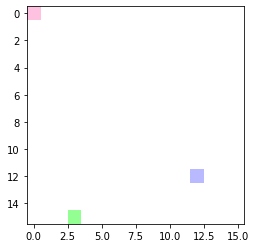

a6fb76c9e4d7b23e8743b6333993068178e1f6e3aebc2995d03750b9bc73cd6e.csv


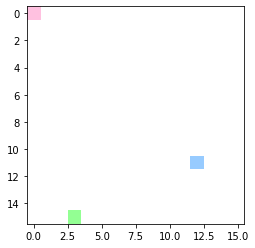

a6fd0981d68ef9254bbc0f2161e6d67c3ec2c804406ae827c2ba80c7ca998a3e.csv


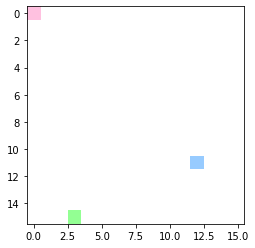

In [12]:
# family: Android
count = 0
unit_time_list = []
image_list = []

for file in family_dict['Android']:
    print(file)
    counting_matrix, unit_time = extract_API_seqence_to_counting_matrix(file)
    img = making_image(counting_matrix)
    count += 1
    unit_time_list.append(unit_time)
    image_list.append(img)
    if count > 100:
        break
        
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.array(unit_time_list).reshape(-1, 1))
for idx, label in enumerate(kmeans.labels_):
    if label == 0:
        img = Image.fromarray(image_list[idx], 'RGB')
        print(family_dict['Android'][idx])
        plt.imshow(img)
        plt.show()

3499
unit_time: 7.2583338767290115


C:\Users\cherry\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


5124
unit_time: 7.466059014201164
3
unit_time: 0.0009236931800842285
2067
unit_time: 3.850297510623932
3
unit_time: 0.0005323141813278198
3
unit_time: 0.002186194062232971
3903
unit_time: 7.412878513336182
3759
unit_time: 7.413888186216354
2301
unit_time: 7.433985874056816
5627
unit_time: 11.658483505249023
765
unit_time: 0.06505712866783142
701
unit_time: 0.08135762810707092
699
unit_time: 0.04703725874423981
3
unit_time: 0.00086936354637146
a414f5031ce26dda56f1ea9dc25b806319245cd954ba02336e7a08b5dcd3cac9.csv


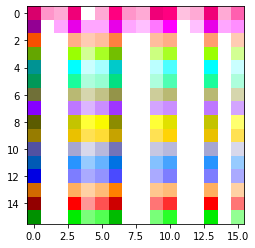

a465e670098e2f994e89a794c7c541b4158d1f9b16d57a73de99fa288965b814.csv


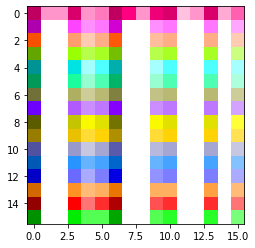

a50ffd06acdcbb126bfbe18516e2d480f78e1f1d15bffbb69f53130da760e30f.csv


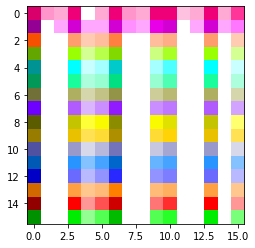

a51f28ea46ca81895bda5481706db3d6b3c6105d7ce917016e8dbb999328f219.csv


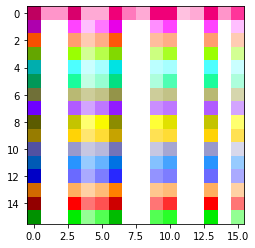

a53ea85d4847089baf38662621f9cddfeb2688cb4b2cd5b3dddc3862b39d44b4.csv


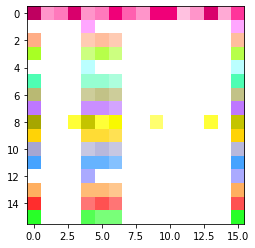

a565ec8e6b5ab839bf760a2a22a1fa7a9cdc84e183e09f1b32b2214afe66a086.csv


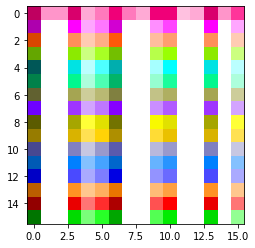

In [13]:
# family: Dofloo
count = 0
unit_time_list = []
image_list = []

for file in family_dict['Dofloo']:
    if query_family(file[0:-4]) == "Dofloo":
        #print(file)
        sample = pd.read_csv(folder + file)
        print(len(sample))
        counting_matrix, unit_time = extract_API_seqence_to_counting_matrix(file)
        img = making_image(counting_matrix)
        count += 1
        unit_time_list.append(unit_time)
        image_list.append(img)
        if count > 100:
            break
        
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.array(unit_time_list).reshape(-1, 1))
for idx, label in enumerate(kmeans.labels_):
    if label == 0:
        img = Image.fromarray(image_list[idx], 'RGB')
        print(family_dict['Dofloo'][idx])
        plt.imshow(img)
        plt.show()

C:\Users\cherry\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\cherry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


unit_time: 0.005726680159568787
unit_time: 7.648858368396759
unit_time: 7.617846995592117
unit_time: 0.0010166168212890625
unit_time: 0.001924365758895874
unit_time: 7.530603751540184
unit_time: 7.680353119969368
unit_time: 7.58690869808197
unit_time: 7.529393434524536
unit_time: 7.598620802164078
unit_time: 7.484366565942764
unit_time: 0.0007000714540481567
unit_time: 0.0037176162004470825
unit_time: 7.752334758639336
unit_time: 7.512174054980278
unit_time: 7.556053251028061
unit_time: 7.574885502457619
unit_time: 0.0019325017929077148
unit_time: 7.571731314063072
unit_time: 7.525948315858841
unit_time: 0.027083680033683777
unit_time: 7.547335311770439
unit_time: 0.0063005536794662476
unit_time: 7.5368946343660355
unit_time: 7.57786625623703
unit_time: 0.0016131997108459473
unit_time: 0.06705500185489655
unit_time: 0.002059370279312134
unit_time: 0.009082123637199402
unit_time: 0.0018273741006851196
unit_time: 0.0017114877700805664
unit_time: 0.012880310416221619
unit_time: 7.49877481

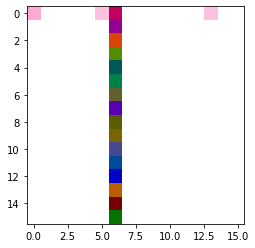

a4158ce65352d9845f146d54c385faea2ff6157b24f8472f538304834c97a2ea.csv


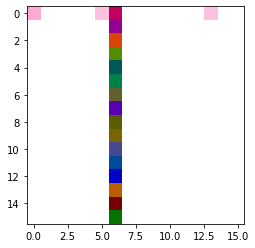

a41cb3a767d7ea0114c59b63256e28584e7e46fccc4ce3161f094d81a27abcf6.csv


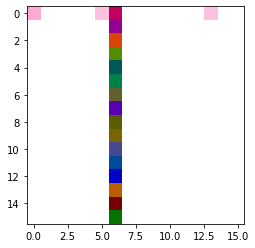

a42487a64501fd9cd1a7d9333be07997218e7dc9534c189d6d9d19d27de540c3.csv


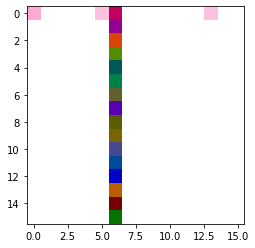

a42641e6a0f7d892f78f27b20e957e9f0f5af2e2e10807c79a287c4087e65a4f.csv


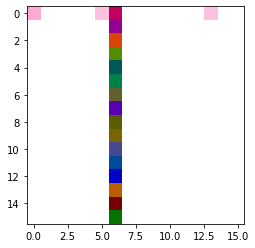

a4282bded5007ecfa619f657565df6f5f2b92489b04979827e81e2b45ce6f9d1.csv


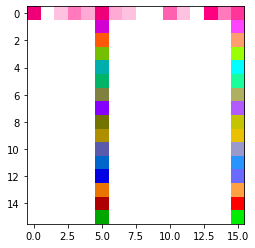

a42fa99f8a738fc7145c003ea6fef1565cd9cf9e9865ac3edb74f7b09e0dd91a.csv


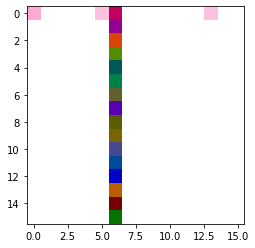

a437c660639976ed0f610cfbca2eea58d8ef465a95b84237f6d4e915b93fc552.csv


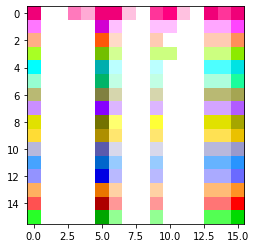

a44b960b73fb864f6127446a1e01ab8c2c0396a858b8417520328633ecc5e3f5.csv


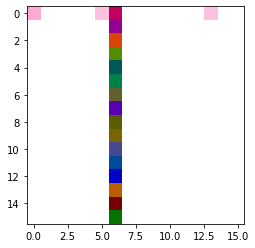

a45428d9b62382b59390779e4d7993be78bd4c37f401d0c9f322b55c03ba910f.csv


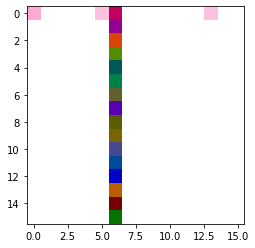

a4582387742d4474ac94b55bccb7d20eae084a4d014c78c8d1b08f87bead106e.csv


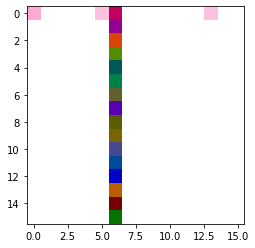

a45b3ff90c29d7c6df50af93b5b652f343cfd60afa888484997636109441eedd.csv


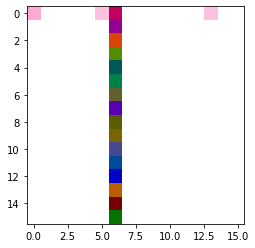

a46315b5e0672c27ad7ade371b6e9e6deb555e3c3db0752cd95386b37247b000.csv


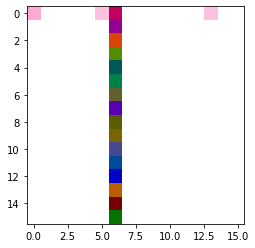

a46f169aa51594cf1f2366e9826d6abb2f63d3a6b68ee662f7b1a4ff177c3d1e.csv


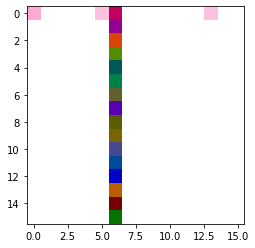

a4771396a132f271a601eb4edd1a8e98e69f5df7d7cf3c5f1a1489c0f44852fe.csv


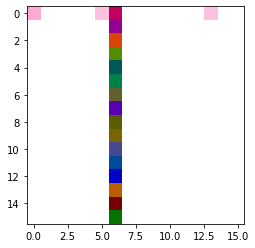

a48526fe250da1fdd9702de7a8b0c06cc9b33b577dce37c977a786d8a60192ea.csv


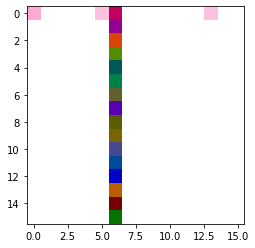

a488469a5bdd21559bf149ee0b7987e4a0a320c1036fa2faa9e751e3f30bf09a.csv


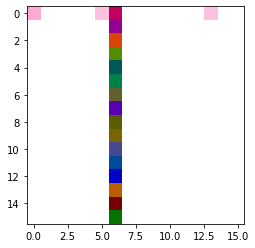

a4c36580a273be80b31c557a70cc6bb46fb0149e2a615cd44c90d513f0c61981.csv


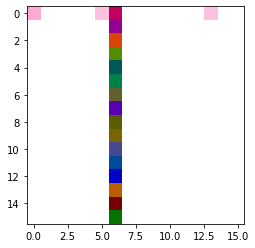

a4c75126c6a6fb40f27674b7aa3ffc80f00f35eceeeff0c71e6a4636665f69b1.csv


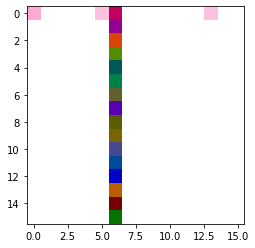

a4cdd01a06b70a3ddcfcc8bef5db49448506c15c9cef516222f9ab32c55a3c8d.csv


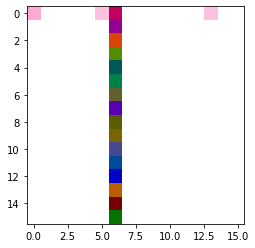

a4cf7c48530c2b6a95c4d83db16f1b73ec36298514f7e7b0b28cd878bfd1a100.csv


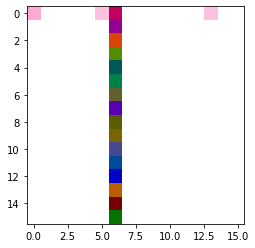

a4d34ef876ec8b6b34ada6df544b2ea32203d0b57f4a7c959084a20f209e14f0.csv


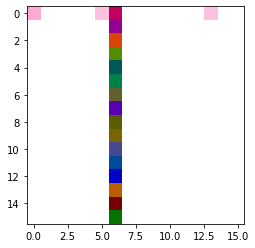

a4ea105974edb1bbbed9d7933d2689f0f002d9b10eb972ddd1f5506076ae2a48.csv


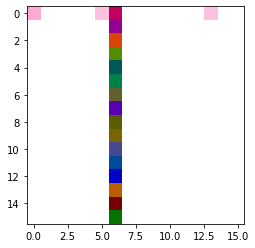

a51146d20a18cef9626254ec8d4cfeebeb484fc5af25fe011641cb9cf1d2b42a.csv


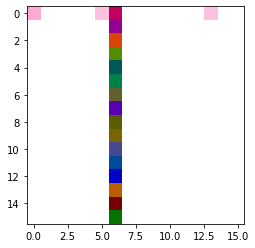

a5174b6b8143121f78b20758bd0fdcd3698850dc4453a4fa70898492b6048785.csv


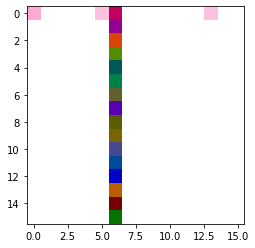

a51cd8b5e08c50c91ebbf11335cc9d515863fefb502dfa81d704093492960a5c.csv


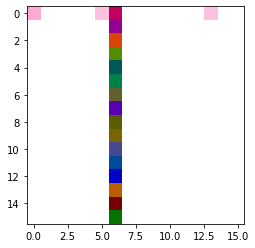

a51fadb777fc2da851314c5f8890af51672d5b1c8c3c01a1d6df0077b1baefaf.csv


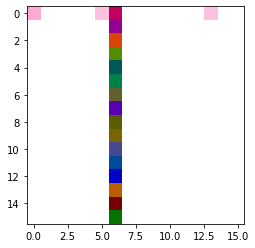

a5342e463fc7c35c7b401a64487f091389b9c79f62370e9e3ac529c384230bc1.csv


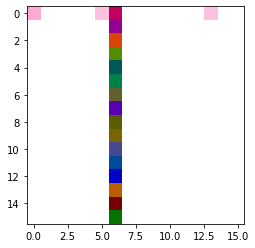

a53bf6f6203ba940608851d9d7cd392232e403c9b21ba5d32d9ad11741faf820.csv


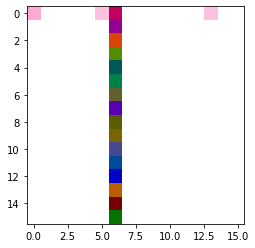

a53c89ce45240ff1877b04e7ef9f52b45059b6e4f1d7012b31ef3c0df089a00b.csv


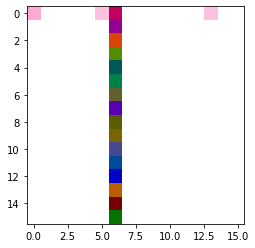

a5463f2ae25ca5c8089d001c5528a60c7026dc2b40ba07bfb29c8ed89ef9e681.csv


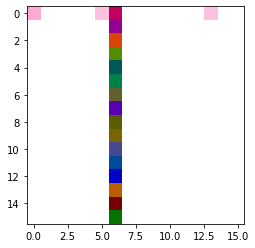

a55271ab41b21a3412013e8a127eafe6a418e987a63c6091285ec48f53e05711.csv


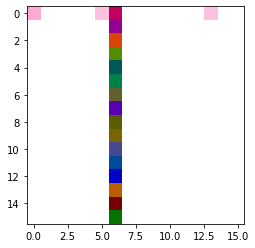

a553ecc5076bd0582c396828d3bb3f91e100bcfe60dad81f7497c75b90804f3d.csv


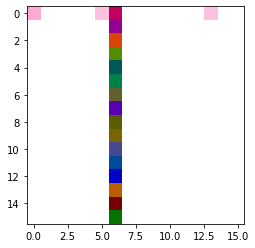

a55ab259f01ad00198def242e3da6627a972d54bc4ad859f2fcac43362791e96.csv


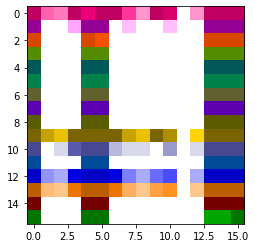

a55cf36ce8bfa7898e6c33ef279ad5ceb96ec6f5a56e8f12d59e4659c7b2e32f.csv


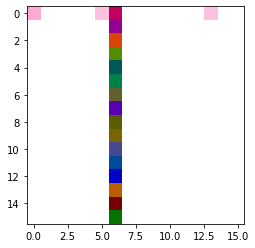

a55fac021389a1ee138feca1585a4656f1a771669dc43c871a1b050198656289.csv


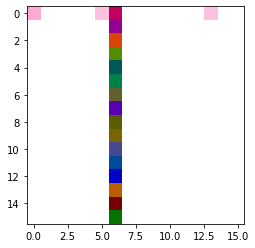

a5786f7e6081a9413a120aa2168be2d437826155db0b7b00b70f46c2f0368bba.csv


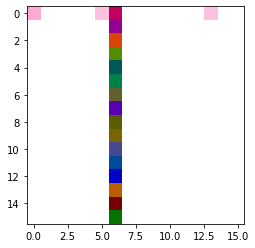

a57bb993ef983ffe28cf0dc643a570c3dec3b9fd653065bb34392e6a7304bf3d.csv


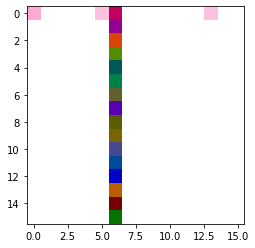

a5804145faa574c95587f6ecf10820e8c736a643dfff8f104420d6a7761b181f.csv


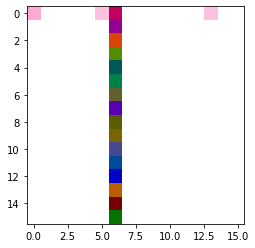

a5804a332e2ae0573a87956807d51761e8c374676fe16ce58850ed76f03d581d.csv


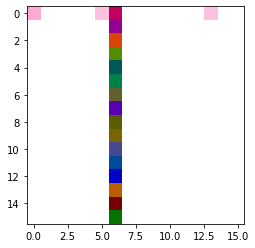

a5830ba2c96e00872eb9080283afd969e78a14fb2681c96e4485c9c3223559a4.csv


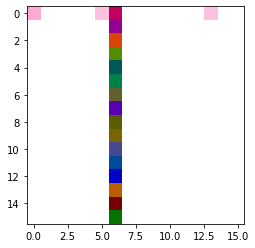

a58d68953e2243e715a9304a5c1d1d6178e0823bbbdb697c10fe2dd26db9df88.csv


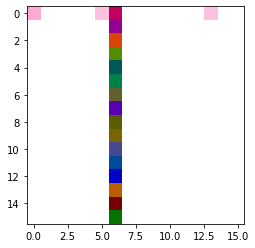

a593379d3914a56f65487f52d33ba46a16a6b4b5865e7c0e8a7ff8aa87e5baa2.csv


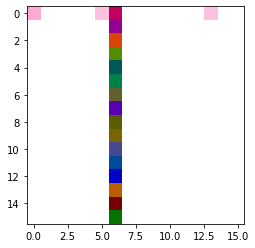

a599ed290ea524f87061e77de7a417fba8cb2b441733135653d58a9698bef324.csv


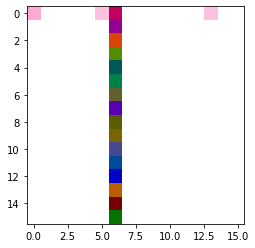

a5a54ac35756fc44ce7e5b0fa262fd42827e6be6d235c1df36246650877a6b38.csv


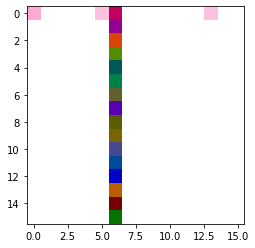

a5bbe52061a3c2b2d0a31744ffe634fb2d7cdbe22afadca41f2f1f34d7b46951.csv


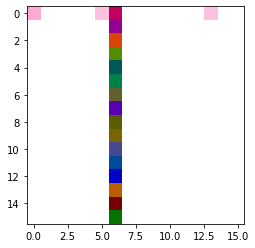

a5c4e292811ef74ba68d2538955e3ed081fa3daef8076f3b313e00497c7e641f.csv


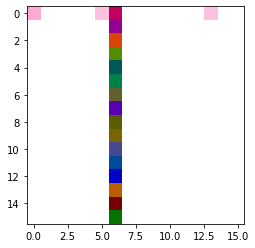

a5c5b1dc0a3e58382602ae645514c702baa780af6c1a9e9006872c9804c512d6.csv


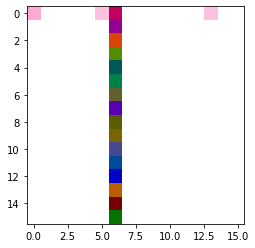

a5e5c3dccf02f5ae0dec80b03e2f2002c5a05c66ecf80afa94992e419c13900e.csv


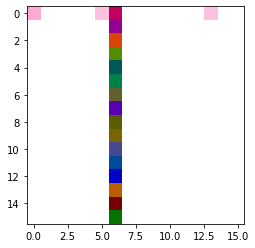

In [14]:
count = 0
unit_time_list = []
image_list = []

for file in family_dict['Unknown']:
    #print(file)
    counting_matrix, unit_time = extract_API_seqence_to_counting_matrix(file)
    img = making_image(counting_matrix)
    count += 1
    unit_time_list.append(unit_time)
    image_list.append(img)
    if count > 100:
        break
        
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.array(unit_time_list).reshape(-1, 1))
for idx, label in enumerate(kmeans.labels_):
    if label == 0:
        img = Image.fromarray(image_list[idx], 'RGB')
        print(family_dict['Unknown'][idx])
        plt.imshow(img)
        plt.show()

a4450a485a010fcbd6718373080e90f4c9285953292b7a1ac45deb5df538f1e0.csv
unit_time: 0.0005948692560195923
a4d57faa7a064bcf0a71cb5dbcaa95d4fe4da22eda60477eca0faad6d1171f6b.csv
unit_time: 0.0026695579290390015


C:\Users\cherry\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


a51155dba96989732586c0fdc055e4b2c5876df3f79e30f92288727ada6c4ab3.csv
unit_time: 7.328144311904907
a561906c1008494253d22c60b3c02689fd03c29a76a3dc949840fd130d528dae.csv
unit_time: 0.008351132273674011
a625601d8fe1f59102fcec617bbf4afa1f81ee305d5e8b93822541a65f7ea498.csv
unit_time: 7.47264738380909
a652ae2b76d2124bea81dddf1ec2b53737d715bba1890f34113eeee148d82c9a.csv
unit_time: 0.005603179335594177
a6c211ed4163e4953923ea448cd535c843c8c7afe6f189bd6b9beb661f4ce20b.csv
unit_time: 0.0034676343202590942
a6e091a33eb0665b0a870e360ea40e68dcc0a852c6f35c70cba86bcad618dc5a.csv
unit_time: 0.0035520046949386597
a6ffc5f875944f63ee69dcf49460d2b7392ce9214c3c5f7a3b34a80ed1ac6680.csv
unit_time: 0.001171007752418518
a78234c3dc78d088ca59f0101986b756541bf97dfb24b86d29a9a42ecea461e1.csv
unit_time: 0.006067812442779541
a51155dba96989732586c0fdc055e4b2c5876df3f79e30f92288727ada6c4ab3.csv


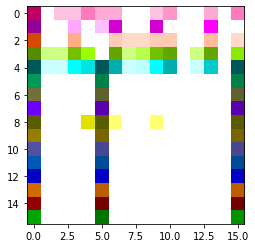

a625601d8fe1f59102fcec617bbf4afa1f81ee305d5e8b93822541a65f7ea498.csv


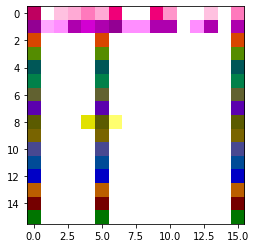

In [15]:
count = 0

unit_time_list = []
image_list = []

for file in family_dict['Hajime']:
    if query_family(file[0:-4]) == "Hajime":
        print(file)
        counting_matrix, unit_time = extract_API_seqence_to_counting_matrix(file)
        img = making_image(counting_matrix)
        count += 1
        unit_time_list.append(unit_time)
        image_list.append(img)
        
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.array(unit_time_list).reshape(-1, 1))
for idx, label in enumerate(kmeans.labels_):
    if label == 1:
        img = Image.fromarray(image_list[idx], 'RGB')
        print(family_dict['Hajime'][idx])
        plt.imshow(img)
        plt.show()

a42c69ec74588e84d05052b522bc01da43140e5a5702a19ee116062fb594076b.csv
unit_time: 0.0015084445476531982
a518b18d18736dbf2f9c75442753dc9489e46cfc7fab169f80bff4b7bf09c625.csv
unit_time: 0.27845731377601624


C:\Users\cherry\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


a535404f5cbe11ba66e2cdfa2bc5e34d01f0a6931b4b02f5ea68bf61e7a07514.csv
unit_time: 0.0006515532732009888
a544d5a88804bacfb998828926d390a945b237e9c2f9433196684835395377f5.csv
unit_time: 0.3083185702562332
a554fac102c283a6f7359a88054ca5b2e9d6bd868b2536b988c83c21e2ff3a45.csv
unit_time: 0.2364097535610199
a5f421d7040c38c7c0cc11cfad08d1cce2314d9e248c57e2fd868acb856f2f15.csv
unit_time: 0.2154478132724762
a6a096e2eec8013e4485e3174f7715fc90415e14ccfa079c403ffc0587b63094.csv
unit_time: 0.005596816539764404
a6bb0c6e336168fa3c359cdc0fe94c75205498ff13a1be499a7747bc9b53ff2c.csv
unit_time: 0.22191868722438812
a6db5122eb52b54be286536904d95f0cf4edbe44c5b0bad1a2dbefe569277e25.csv
unit_time: 0.005591884255409241
a6dc95edf7faaeb1d3d5d098a337bb335aee6fc9fc4410ebe86ee6c6a86d3c53.csv
unit_time: 0.00406569242477417
a76c17df1501b2b848c3b3969e3605d2b5775fea0594bd722ab9518ba4c34f5b.csv
unit_time: 0.0010036230087280273
a7c1877f5022525f279428c07e037b3cc89f9ba01ed3ca9322d0e3fa8b7f13ce.csv
unit_time: 0.304546058177948

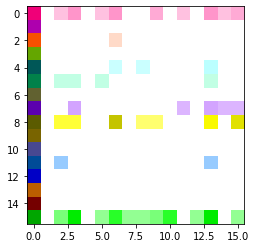

a544d5a88804bacfb998828926d390a945b237e9c2f9433196684835395377f5.csv


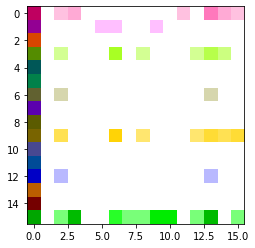

a554fac102c283a6f7359a88054ca5b2e9d6bd868b2536b988c83c21e2ff3a45.csv


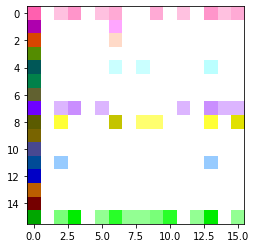

a5f421d7040c38c7c0cc11cfad08d1cce2314d9e248c57e2fd868acb856f2f15.csv


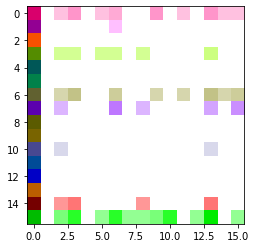

a6bb0c6e336168fa3c359cdc0fe94c75205498ff13a1be499a7747bc9b53ff2c.csv


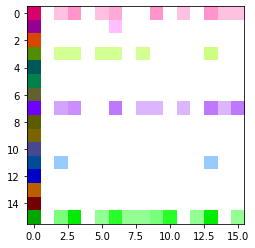

a7c1877f5022525f279428c07e037b3cc89f9ba01ed3ca9322d0e3fa8b7f13ce.csv


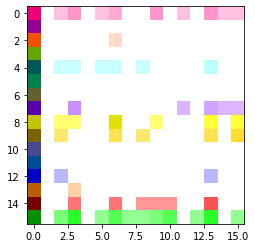

a7cd06749b14790bd63e020ea0ff35ebe8513f5d72fcccfd4df3841a3910b75d.csv


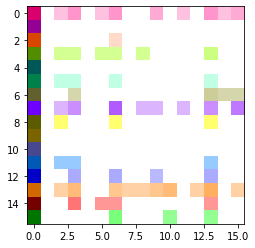

In [16]:
unit_time_list = []
image_list = []

count = 0
for file in family_dict['Xorddos']:
    if query_family(file[0:-4]) == "Xorddos":
        print(file)
        counting_matrix, unit_time = extract_API_seqence_to_counting_matrix(file)
        img = making_image(counting_matrix)
        count += 1
        unit_time_list.append(unit_time)
        image_list.append(img)
        
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.array(unit_time_list).reshape(-1, 1))
for idx, label in enumerate(kmeans.labels_):
    if label == 0:
        img = Image.fromarray(image_list[idx], 'RGB')
        print(family_dict['Xorddos'][idx])
        plt.imshow(img)
        plt.show()